<b><h1>Table of contents</h1><b>

<h3><b>&emsp;1. Data import</b></h3>

<h3><b>&emsp;2. Data cleaning</b></h3>
    <h6><b>&emsp;&emsp;&emsp; 2.1. Corrections</b></h6>
    <h6><b>&emsp;&emsp;&emsp; 2.2. Duplicates</b></h6>
    <h6><b>&emsp;&emsp;&emsp; 2.3. Missing values: Ordinal variables</b></h6>
    <h6><b>&emsp;&emsp;&emsp; 2.4. Missing values: Categorical variables</b></h6>
    <h6><b>&emsp;&emsp;&emsp; 2.5. Consistency check</b></h6>
    <h6><b>&emsp;&emsp;&emsp; 2.6. Missing values imputation</b></h6>
    
    
<h3><b>&emsp;3. Data exploration</b></h3>
    <h6><b>&emsp;&emsp;&emsp; 3.1. Discrete variables </b></h6>
    <h6><b>&emsp;&emsp;&emsp; 3.2. Continuous variables </b></h6>
    <h6><b>&emsp;&emsp;&emsp; 3.3. Ordinal variables </b></h6>
    <h6><b>&emsp;&emsp;&emsp; 3.4. Categorical variables </b></h6>
    
<h3><b>&emsp;4. Machine Learning</b></h3>
    <h6><b>&emsp;&emsp;&emsp;4.1. Detailed procedure</b></h6>
    <h6><b>&emsp;&emsp;&emsp;4.2. Simple model (2 variables) </b></h6>
        <h6><b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;4.2.1. Simple model summary </b></h6> 
    <h6><b>&emsp;&emsp;&emsp;4.3.  Intermediate model (10 variables + one-hot encoding)</b></h6>
        <h6><b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;4.3.1.  Intermediate model summary</b></h6>
    <h6><b>&emsp;&emsp;&emsp;4.4. Complex model (all variables)</b></h6>
            <h6><b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;4.4.1. Complex model summary</b></h6><h6>
        <b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;4.4.2. Regularization</b></h6>
    <h6><b>&emsp;&emsp;&emsp;4.5. Final models comparison</b></h6>
    
_____________________________________

<h3><b>1. Data import</b></h3>

____________________________

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

df_train = pd.read_csv('house-prices.csv')
df_test = pd.read_csv('house-prices-test.csv')

print('df_train:', df_train.shape)
print('df_test:', df_test.shape)

df_train: (2430, 82)
df_test: (500, 81)


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

In [3]:
#remove the white spaces in the columns name
df_train.columns = df_train.columns.str.replace(' ', '_')
df_test.columns = df_test.columns.str.replace(' ', '_')

In [4]:
#rename variables with numbers or special characters

df_train.rename(columns = {'Year_Remod/Add':'Year_Remod_Add'}, inplace = True)
df_test.rename(columns = {'Year_Remod/Add':'Year_Remod_Add'}, inplace = True)

df_train.rename(columns = {'1st_Flr_SF':'first_Flr_SF'}, inplace = True)
df_test.rename(columns = {'1st_Flr_SF':'first_Flr_SF'}, inplace = True)

df_train.rename(columns = {'2nd_Flr_SF':'second_Flr_SF'}, inplace = True)
df_test.rename(columns = {'2nd_Flr_SF':'second_Flr_SF'}, inplace = True)

df_train.rename(columns = {'3Ssn_Porch':'threeSsn_Porch'}, inplace = True)
df_test.rename(columns = {'3Ssn_Porch':'threeSsn_Porch'}, inplace = True)

______________________________
<h4><b>2.Data cleaning</b></h4>

_____________________________

<h6><b>2.1. Corrections</b></h6>

______________________

First I need to correct 'MS_SubClass', which is not really a variable. I will add 'dwelling_' before each number

In [5]:
#add 'dwelling_'
df_train['MS_SubClass'] = ['dwelling_'+str(x) for x in df_train['MS_SubClass']]
df_test['MS_SubClass'] = ['dwelling_'+str(x) for x in df_test['MS_SubClass']]

The documentation.txt suggests to remove the houses with more than 4000 square feet from the data set

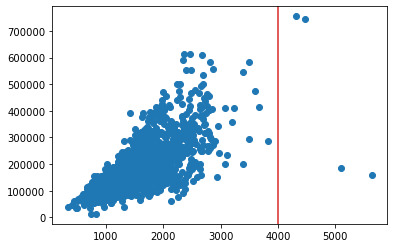

In [6]:
#plot the correlation between Gr_Liv_Area and SalePrice

%matplotlib inline
import matplotlib.pyplot as plt

plt.axvline(x=4000, c='C3')
plt.scatter(df_train.Gr_Liv_Area, df_train.SalePrice);

In [7]:
df_train = df_train[df_train['Gr_Liv_Area'] < 4000] #4 rows are deleted

____________________
<h6><b>2.2. Duplicates</b></h6>

____________________

In this section, I will first check for duplicates.

In [8]:
#use the two identifiers order and PID to find duplicates
df_train.drop_duplicates(['Order','PID'], inplace=True)

df_test_PID = pd.DataFrame(df_test.PID)#I need to save this column for the final models evaluation
df_test.drop_duplicates(['Order','PID'], inplace=True)

print('df_train:', df_train.shape)

df_train: (2426, 82)


Since I don't have duplicates I can drop the Order and PID columns

In [9]:
#drop order and PID
df_train.drop(['Order', 'PID'], axis = 1, inplace = True) 
df_test.drop(['Order', 'PID'], axis = 1, inplace = True) 

print('df_train:', df_train.shape)

df_train: (2426, 80)


In [10]:
#check the variables with more missing values
pd.DataFrame(df_train.isnull().mean().sort_values(ascending = False).head(12), columns=['nan%'])

nan%
Pool_QC        0.995878
Misc_Feature   0.963314
Alley          0.932811
Fence          0.798846
Fireplace_Qu   0.488871
Lot_Frontage   0.173124
Garage_Cond    0.056884
Garage_Qual    0.056884
Garage_Yr_Blt  0.056884
Garage_Finish  0.056884
Garage_Type    0.056059
Bsmt_Exposure  0.030503

______________________
<h6><b>2.3. Missing values: Ordinal variables</b></h6>

______________________


Here I will convert the ordinal variables to ensure that those are all numerics. The missing values will be converted to 0 assuming that the absence of a certain feature will lead to a lower SalePrice.

In [11]:
#replace train (as lower limit I sue 1 to allow missing values to be 0)
df_train.replace({'Exter_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Exter_Cond' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Bsmt_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Bsmt_Cond' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Heating_QC' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Kitchen_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Fireplace_Qu' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Garage_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Garage_Cond'  : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}}, inplace=True)

df_train.replace({'Pool_QC' : {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1}}, inplace=True)
df_train.replace({'Lot_Shape' : {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}}, inplace=True)
df_train.replace({'Utilities' : {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}}, inplace=True)
df_train.replace({'Land_Slope' : {'Gtl':3, 'Mod':2, 'Sev':1}}, inplace=True)
df_train.replace({'Bsmt_Exposure' : {'Gd':4, 'Av':3, 'Mn':2, 'No':1}}, inplace=True)
df_train.replace({'BsmtFin_Type_1' : {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}}, inplace=True)
df_train.replace({'BsmtFin_Type_2' : {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}}, inplace=True)
df_train.replace({'Electrical' : {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1}}, inplace=True)
df_train.replace({'Functional' : {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}}, inplace=True)
df_train.replace({'Garage_Finish' : {'Fin':3, 'RFn':2, 'Unf':1}}, inplace=True)
df_train.replace({'Paved_Drive' : {'Y':3, 'P':2, 'N':1}}, inplace=True)
df_train.replace({'Fence' : {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1}}, inplace=True)


#replace test (as lower limit I sue 1 to allow missing values to be 0)
df_test.replace({'Exter_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Exter_Cond' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Bsmt_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Bsmt_Cond' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Heating_QC' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Kitchen_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Fireplace_Qu' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Garage_Qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
                  'Garage_Cond'  : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}}, inplace=True)

df_test.replace({'Pool_QC' : {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1}}, inplace=True)
df_test.replace({'Lot_Shape' : {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}}, inplace=True)
df_test.replace({'Utilities' : {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}}, inplace=True)
df_test.replace({'Land_Slope' : {'Gtl':3, 'Mod':2, 'Sev':1}}, inplace=True)
df_test.replace({'Bsmt_Exposure' : {'Gd':4, 'Av':3, 'Mn':2, 'No':1}}, inplace=True)
df_test.replace({'BsmtFin_Type_1' : {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}}, inplace=True)
df_test.replace({'BsmtFin_Type_2' : {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}}, inplace=True)
df_test.replace({'Electrical' : {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1}}, inplace=True)
df_test.replace({'Functional' : {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}}, inplace=True)
df_test.replace({'Garage_Finish' : {'Fin':3, 'RFn':2, 'Unf':1}}, inplace=True)
df_test.replace({'Paved_Drive' : {'Y':3, 'P':2, 'N':1}}, inplace=True)
df_test.replace({'Fence' : {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1}}, inplace=True)     

#Central_Air is binary (N/Y)
df_train.replace({'Central_Air' : {'N':0, 'Y':1}}, inplace=True)
df_test.replace({'Central_Air' : {'N':0, 'Y':1}}, inplace=True)

In [12]:
#fillna train
df_train.fillna({'Exter_Qual': 0, 'Exter_Cond': 0, 'Bsmt_Qual': 0,
                'Bsmt_Cond': 0, 'Heating_QC': 0, 'Kitchen_Qual': 0,
                'Fireplace_Qu': 0, 'Garage_Qual': 0, 'Garage_Cond': 0,
                'Pool_QC': 0, 'Lot_Shape': 0, 'Utilities': 0,
                'Land_Slope': 0, 'Bsmt_Exposure': 0, 'BsmtFin_Type_1': 0,
                'BsmtFin_Type_2': 0, 'Electrical': 0, 'Functional': 0,
                'Central_Air' : 0, 'Garage_Finish': 0, 'Paved_Drive': 0, 'Fence': 0}, inplace = True)

#fillna test
df_test.fillna({'Exter_Qual': 0, 'Exter_Cond': 0, 'Bsmt_Qual': 0,
                'Bsmt_Cond': 0, 'Heating_QC': 0, 'Kitchen_Qual': 0,
                'Fireplace_Qu': 0, 'Garage_Qual': 0, 'Garage_Cond': 0,
                'Pool_QC': 0, 'Lot_Shape': 0, 'Utilities': 0,
                'Land_Slope': 0, 'Bsmt_Exposure': 0, 'BsmtFin_Type_1': 0,
                'BsmtFin_Type_2': 0, 'Electrical': 0, 'Functional': 0,
                'Central_Air' : 0, 'Garage_Finish': 0, 'Paved_Drive': 0, 'Fence': 0}, inplace = True)

________________________
<h6><b>2.4. Categorical variables</b></h6>

________________________

Here missing values will be replaced by 'none'.

In [13]:
#the variable Mas_Vnr_Type contains 'None'. I will turn that to 'none' to be consistent
df_train.replace({'Mas_Vnr_Type' : {'None':'none'}}, inplace=True)
df_test.replace({'Mas_Vnr_Type' : {'None':'none'}}, inplace=True)

#fillna train
df_train.fillna({'MS_SubClass': 'none','MS_Zoning': 'none','Street': 'none',
                 'Alley': 'none','Land_Contour': 'none','Lot_Config': 'none',
                 'Neighborhood': 'none','Condition_1': 'none','Condition_2': 'none',
                 'Bldg_Type': 'none','House_Style': 'none','Roof_Style': 'none',
                 'Roof_Matl': 'none','Exterior_1': 'none','Exterior_2': 'none',
                 'Mas_Vnr_Type': 'none','Foundation': 'none','Heating': 'none',
                 'Garage_Type': 'none','Misc_Feature': 'none',
                 'Sale_Type': 'none','Sale_Condition': 'none'}, inplace = True)

#fillna test
df_test.fillna({'MS_SubClass': 'none','MS_Zoning': 'none','Street': 'none',
                 'Alley': 'none','Land_Contour': 'none','Lot_Config': 'none',
                 'Neighborhood': 'none','Condition_1': 'none','Condition_2': 'none',
                 'Bldg_Type': 'none','House_Style': 'none','Roof_Style': 'none',
                 'Roof_Matl': 'none','Exterior_1': 'none','Exterior_2': 'none',
                 'Mas_Vnr_Type': 'none','Foundation': 'none','Heating': 'none',
                 'Garage_Type': 'none','Misc_Feature': 'none',
                 'Sale_Type': 'none','Sale_Condition': 'none'}, inplace = True)

________________________

In [14]:
#check the variables with more missing values again
pd.DataFrame(df_train.isnull().mean().sort_values(ascending = False).head(12), columns=['nan%'])

nan%
Lot_Frontage    0.173124
Garage_Yr_Blt   0.056884
Mas_Vnr_Area    0.008244
Bsmt_Full_Bath  0.000824
Bsmt_Half_Bath  0.000824
Garage_Area     0.000412
BsmtFin_SF_2    0.000412
BsmtFin_SF_1    0.000412
Bsmt_Unf_SF     0.000412
Garage_Cars     0.000412
Total_Bsmt_SF   0.000412
Land_Slope      0.000000

The remaining missing values are all located in continuous or discrete variables

________________
<h6><b>2.5. Consistency check </b></h6>

___________________

Here below I test a few ideas to see if the data are consistent. By doing this task I will also attempt to fill the remaining missing values when possible.

<b>Basement variables</b>. The logic here is that all the ordinal variables that refer to the basement (5 in total) must have as sum ==5 or ==0 (no basement). If the sum is between 1 and 4 it means that one variable has something wrong, i.e. one of the values referring to the basement is == 0 which correspond to no basement. 

In [15]:
df_train[['Bsmt_Qual','Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2']].sum(axis=1).unique()

array([15.,  9., 11., 10., 19., 12., 13., 14., 17., 18.,  0., 16.,  7.,
        8., 20.,  6., 22., 23., 21.])

No values are below 5 

Since the previous variables seems ok I will use a random one (Bsmt_Qual) as control to compare with Bsmt_Full_Bath to check if the missing values in Bsmt_Full_Bath are real missing values or errors (errors when NaN is associated to a number >0 in the control variable)

In [16]:
df_train.Bsmt_Full_Bath.isna().sum()

2

In [17]:
df_train[['Bsmt_Full_Bath', 'Bsmt_Qual']].sort_values(by='Bsmt_Full_Bath', ascending = False).tail(2)#I order and call the tail to see my 2 NaN

Bsmt_Full_Bath  Bsmt_Qual
104              NaN        0.0
2056             NaN        0.0

This suggests that those NaN correspond to no Bsmt_Full_Bath. I fill the missing values with 0.

In [18]:
df_train['Bsmt_Full_Bath'] = df_train['Bsmt_Full_Bath'].fillna(0)

I will apply the same approach for the following variables:<br>
- Bsmt_Half_Bath<br>
- BsmtFin_SF_2<br>
- BsmtFin_SF_1<br>
- Bsmt_Unf_SF<br>
- Total_Bsmt_SF<br>

In [19]:
pd.DataFrame(df_train[['Bsmt_Half_Bath', 'BsmtFin_SF_2','BsmtFin_SF_1','Bsmt_Unf_SF','Total_Bsmt_SF']].isna().sum(), columns=['nan_sum'])

nan_sum
Bsmt_Half_Bath        2
BsmtFin_SF_2          1
BsmtFin_SF_1          1
Bsmt_Unf_SF           1
Total_Bsmt_SF         1

In [20]:
df_train[['Bsmt_Half_Bath', 'BsmtFin_SF_2','BsmtFin_SF_1','Bsmt_Unf_SF','Total_Bsmt_SF','Bsmt_Qual']].sort_values(by='Bsmt_Half_Bath', ascending = False).tail(2)#I order and call the tail to see my 2 NaN

Bsmt_Half_Bath  BsmtFin_SF_2  BsmtFin_SF_1  Bsmt_Unf_SF  Total_Bsmt_SF  \
104              NaN           NaN           NaN          NaN            NaN   
2056             NaN           0.0           0.0          0.0            0.0   

      Bsmt_Qual  
104         0.0  
2056        0.0

Missing values are located in the same rows and indicate the absence of basement for those rows. I fill them with 0.

In [21]:
df_train['Bsmt_Half_Bath'] = df_train['Bsmt_Half_Bath'].fillna(0)
df_train['BsmtFin_SF_2'] = df_train['BsmtFin_SF_2'].fillna(0)
df_train['BsmtFin_SF_1'] = df_train['BsmtFin_SF_1'].fillna(0)
df_train['Bsmt_Unf_SF'] = df_train['Bsmt_Unf_SF'].fillna(0)
df_train['Total_Bsmt_SF'] = df_train['Total_Bsmt_SF'].fillna(0)

_____________________

<b>first_Flr_SF and second_Flr_SF</b> should not be smaller than the <b>Gr_Liv_Area</b> 

In [22]:
check=pd.DataFrame(df_train['first_Flr_SF'] & df_train['second_Flr_SF'] > df_train['Gr_Liv_Area'],columns=['difference'])
check['difference'].value_counts()

False    2426
Name: difference, dtype: int64

Living area is not bigger than a floor

_____________________

Where <b>Fireplaces</b> is == 0 Fireplace_Qu must be 0 and also same for the opposite

In [23]:
df_train[(df_train.Fireplaces == 0) & (df_train.Fireplace_Qu > 1)]

Empty DataFrame
Columns: [MS_SubClass, MS_Zoning, Lot_Frontage, Lot_Area, Street, Alley, Lot_Shape, Land_Contour, Utilities, Lot_Config, Land_Slope, Neighborhood, Condition_1, Condition_2, Bldg_Type, House_Style, Overall_Qual, Overall_Cond, Year_Built, Year_Remod_Add, Roof_Style, Roof_Matl, Exterior_1st, Exterior_2nd, Mas_Vnr_Type, Mas_Vnr_Area, Exter_Qual, Exter_Cond, Foundation, Bsmt_Qual, Bsmt_Cond, Bsmt_Exposure, BsmtFin_Type_1, BsmtFin_SF_1, BsmtFin_Type_2, BsmtFin_SF_2, Bsmt_Unf_SF, Total_Bsmt_SF, Heating, Heating_QC, Central_Air, Electrical, first_Flr_SF, second_Flr_SF, Low_Qual_Fin_SF, Gr_Liv_Area, Bsmt_Full_Bath, Bsmt_Half_Bath, Full_Bath, Half_Bath, Bedroom_AbvGr, Kitchen_AbvGr, Kitchen_Qual, TotRms_AbvGrd, Functional, Fireplaces, Fireplace_Qu, Garage_Type, Garage_Yr_Blt, Garage_Finish, Garage_Cars, Garage_Area, Garage_Qual, Garage_Cond, Paved_Drive, Wood_Deck_SF, Open_Porch_SF, Enclosed_Porch, threeSsn_Porch, Screen_Porch, Pool_Area, Pool_QC, Fence, Misc_Feature, Misc_Val, Mo_Sold, Yr_Sold, Sale_Type, Sale_Condition, SalePrice]
Index: []

[0 rows x 80 columns]

In [24]:
df_train[(df_train.Fireplaces > 1) & (df_train.Fireplace_Qu == 0)]

Empty DataFrame
Columns: [MS_SubClass, MS_Zoning, Lot_Frontage, Lot_Area, Street, Alley, Lot_Shape, Land_Contour, Utilities, Lot_Config, Land_Slope, Neighborhood, Condition_1, Condition_2, Bldg_Type, House_Style, Overall_Qual, Overall_Cond, Year_Built, Year_Remod_Add, Roof_Style, Roof_Matl, Exterior_1st, Exterior_2nd, Mas_Vnr_Type, Mas_Vnr_Area, Exter_Qual, Exter_Cond, Foundation, Bsmt_Qual, Bsmt_Cond, Bsmt_Exposure, BsmtFin_Type_1, BsmtFin_SF_1, BsmtFin_Type_2, BsmtFin_SF_2, Bsmt_Unf_SF, Total_Bsmt_SF, Heating, Heating_QC, Central_Air, Electrical, first_Flr_SF, second_Flr_SF, Low_Qual_Fin_SF, Gr_Liv_Area, Bsmt_Full_Bath, Bsmt_Half_Bath, Full_Bath, Half_Bath, Bedroom_AbvGr, Kitchen_AbvGr, Kitchen_Qual, TotRms_AbvGrd, Functional, Fireplaces, Fireplace_Qu, Garage_Type, Garage_Yr_Blt, Garage_Finish, Garage_Cars, Garage_Area, Garage_Qual, Garage_Cond, Paved_Drive, Wood_Deck_SF, Open_Porch_SF, Enclosed_Porch, threeSsn_Porch, Screen_Porch, Pool_Area, Pool_QC, Fence, Misc_Feature, Misc_Val, Mo_Sold, Yr_Sold, Sale_Type, Sale_Condition, SalePrice]
Index: []

[0 rows x 80 columns]

_____________________

<b>Garage variables</b>. There are several variables associated with the presence of a garage. I will first check what are those missing values in the Garage_Yr_Blt variable.

In [25]:
df_train.Garage_Yr_Blt.isnull().sum()

138

Let's check if this value is the same of 'none' category in the Garage_Type

In [26]:
df_train.Garage_Type.value_counts()

Attchd     1432
Detchd      650
BuiltIn     147
none        136
Basment      28
2Types       22
CarPort      11
Name: Garage_Type, dtype: int64

Most of the missing values and 'none' are probably located in adjacent columns.

In [27]:
garage_control = df_train[(df_train.Garage_Type == 'none') & (df_train.Garage_Yr_Blt).isna()]
garage_control[['Garage_Type','Garage_Yr_Blt']]

Garage_Type  Garage_Yr_Blt
16          none            NaN
48          none            NaN
62          none            NaN
73          none            NaN
76          none            NaN
...          ...            ...
2292        none            NaN
2308        none            NaN
2314        none            NaN
2354        none            NaN
2425        none            NaN

[136 rows x 2 columns]

I don't have a real reason to keep those values but the idea is to keep as much data as I can and I will replace the null values with 0.

In [28]:
#conditional fill based on Garage_Type
df_train.loc[(df_train['Garage_Type']=='none') & df_train['Garage_Yr_Blt'].isnull(), 'Garage_Yr_Blt'] = 0

let's check the last 2 missing values.

In [29]:
df_train[['Garage_Type', 'Garage_Yr_Blt','Garage_Finish','Garage_Qual','Garage_Cond','Garage_Cars','Garage_Area']].sort_values(by='Garage_Yr_Blt', ascending = False).tail(2)#I order and call the tail to see my 2 NaN

Garage_Type  Garage_Yr_Blt  Garage_Finish  Garage_Qual  Garage_Cond  \
1114      Detchd            NaN            0.0          0.0          0.0   
1565      Detchd            NaN            0.0          0.0          0.0   

      Garage_Cars  Garage_Area  
1114          1.0        360.0  
1565          NaN          NaN

I decide to replace the values assuming that those entries have no garage. Indeed, there is more evidence that there is no garage (assumption based on Garage_Yr_Blt, Garage_Finish, Garage_Cond)

In [30]:
indices = [1114,1565]
df_train.loc[indices,'Garage_Type'] = 'none'
df_train.loc[indices,'Garage_Yr_Blt'] = 0
df_train.loc[indices,'Garage_Cars'] = 0
df_train.loc[indices,'Garage_Area'] = 0

________________________

<b>Mas_Vnr_Type and Mas_Vnr_Area</b>. If Mas_Vnr_Type is ==none then Mas_Vnr_Area must be == 0

In [31]:
Mas_control=df_train[(df_train.Mas_Vnr_Type == 'none') & (df_train.Mas_Vnr_Area > 0)]
Mas_control[['Mas_Vnr_Type','Mas_Vnr_Area']]

Mas_Vnr_Type  Mas_Vnr_Area
631          none         285.0
1286         none           1.0
1546         none         344.0
1737         none         312.0
1975         none           1.0
2135         none         288.0
2256         none           1.0

Those values in Mas_Vnr_Area are wrong and I will replace them with 0 (the opposite could be also true but I don't have a unique criteria for replacing and I decide to drop the data)

In [32]:
indices = [631,1286,1546,1737,1975,2135,2256]
df_train.loc[indices,'Mas_Vnr_Area'] = 0

there are still missing values in Mas_Vnr_Area

In [33]:
df_train.Mas_Vnr_Area.isna().sum()

20

In [34]:
df_train[['Mas_Vnr_Type','Mas_Vnr_Area']].sort_values(by='Mas_Vnr_Area', ascending = False).tail(20)#I order and call the tail to see my 18 NaN

Mas_Vnr_Type  Mas_Vnr_Area
66           none           NaN
83           none           NaN
101          none           NaN
159          none           NaN
201          none           NaN
270          none           NaN
352          none           NaN
447          none           NaN
456          none           NaN
457          none           NaN
465          none           NaN
624          none           NaN
851          none           NaN
891          none           NaN
1098         none           NaN
1480         none           NaN
1592         none           NaN
1832         none           NaN
2137         none           NaN
2219         none           NaN

I replace those with 0

In [35]:
df_train['Mas_Vnr_Area'] = df_train['Mas_Vnr_Area'].fillna(0)

__________________________
<h6><b>2.6. Missing values imputation</b></h6>

____________________

In [36]:
#check the variables with more missing values
#train
pd.DataFrame(df_train.isnull().mean().sort_values(ascending = False).head(5), columns=['nan%'])

nan%
Lot_Frontage  0.173124
SalePrice     0.000000
Bsmt_Qual     0.000000
Exterior_1st  0.000000
Exterior_2nd  0.000000

In [37]:
#test
pd.DataFrame(df_test.isnull().mean().sort_values(ascending = False).head(5), columns=['nan%'])

nan%
Lot_Frontage   0.140
Garage_Yr_Blt  0.042
Mas_Vnr_Area   0.006
Foundation     0.000
Roof_Matl      0.000

In [38]:
#I replace the missing values for Garage_Yr_Blt and Mas_Vnr_Area with 0
df_test['Garage_Yr_Blt'] = df_test['Garage_Yr_Blt'].fillna(0)
df_test['Mas_Vnr_Area'] = df_test['Mas_Vnr_Area'].fillna(0)

__________________________
<h3><b>3. Data exploration</b></h3>

____________________

Here I will plot the df_train variables and their association with the target SalePrice. For each of those I will decide<br>
1) how to handle the <b>outliers</b>. I will mainly do it visually looking at the correlations with the SalesPrice considering outliers those values that are far from the variable mean and they don't look to consistently decrease/increase the SalePrice.<br>
2) whether the variables are suitable for <b>feature engeneering</b> (the same features will applied to the test set in the meantime to ensure the same dataframe size)<br>
3) How the <b>data distribution</b> change manipulating tha data (log transformation, 0 values filter).

____________________
<h6><b>3.1. Discrete variables </b></h6>

___________________

Note: values on replots refer to the Pearson coefficient.

In [39]:
import seaborn as sns

count    2426.000000
mean     1971.117477
std        30.206516
min      1875.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: Year_Built, dtype: float64


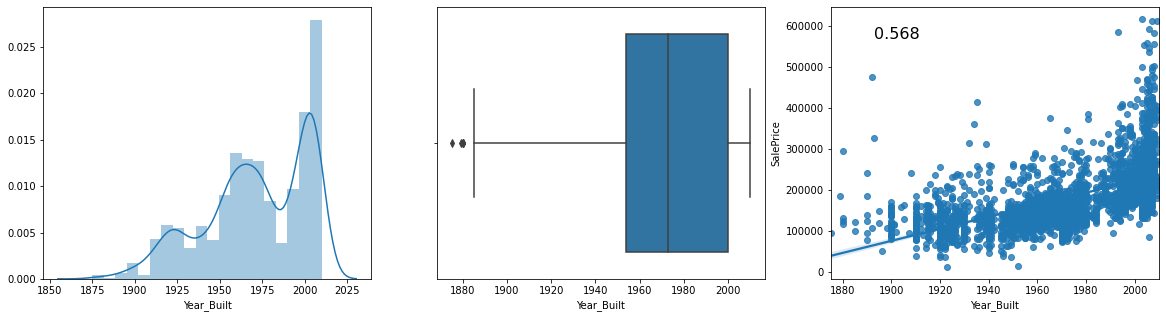

In [40]:
print(df_train.Year_Built.describe())
cor=df_train['Year_Built'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Year_Built, ax=ax1)
sns.boxplot(df_train.Year_Built, ax=ax2)
sns.regplot(x='Year_Built', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

Looking at the distplot looks like that there are 2 deflections in the numbert of new properties built, (1925-1950, 1975-2000). This information might be used to define 2 thresholds for the price variations since it seems that they increase somehow linearly.

In [41]:
#Here I search the year with less cases between 1925 and 1950
def_1=df_train[(df_train.Year_Built > 1925) & (df_train.Year_Built < 1950)]
def_1.Year_Built.value_counts().sort_values().head(5)

1932    4
1934    4
1931    5
1942    5
1937    7
Name: Year_Built, dtype: int64

In [42]:
#Here I search the year with less cases between 1950 and 2000
def_2=df_train[(df_train.Year_Built > 1950) & (df_train.Year_Built < 2000)]
def_2.Year_Built.value_counts().sort_values().head(5)

1982    3
1985    5
1983    6
1987    6
1989    7
Name: Year_Built, dtype: int64

I will use the year 1934 to define the first threshold and 1982 for the second. I will define 3 periods.

In [43]:
#train
df_train.loc[df_train['Year_Built'] <= 1934, 'year_built_tresh'] = 'period_1'
df_train.loc[(df_train['Year_Built'] > 1934) & (df_train['Year_Built'] <= 1982),'year_built_tresh'] = 'period_2'
df_train.loc[df_train['Year_Built'] > 1982, 'year_built_tresh'] = 'period_3'

#test (periods are defined based on the train test to avoid data leakage)
df_test.loc[df_test['Year_Built'] <= 1934, 'year_built_tresh'] = 'period_1'
df_test.loc[(df_test['Year_Built'] > 1934) & (df_test['Year_Built'] <= 1982),'year_built_tresh'] = 'period_2'
df_test.loc[df_test['Year_Built'] > 1982, 'year_built_tresh'] = 'period_3'

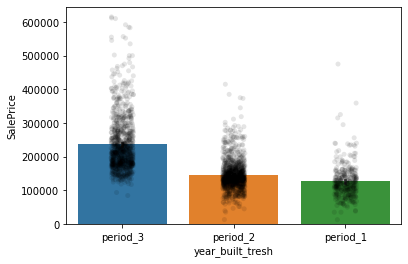

In [44]:
sns.barplot(x="year_built_tresh", y="SalePrice", data=df_train)
sns.stripplot(x="year_built_tresh", y="SalePrice", data=df_train, color="0", alpha=.1);

The boom of prices is quite evident after the 80'

__________

count    2426.000000
mean     1984.209398
std        20.754030
min      1950.000000
25%      1965.250000
50%      1993.000000
75%      2003.000000
max      2010.000000
Name: Year_Remod_Add, dtype: float64


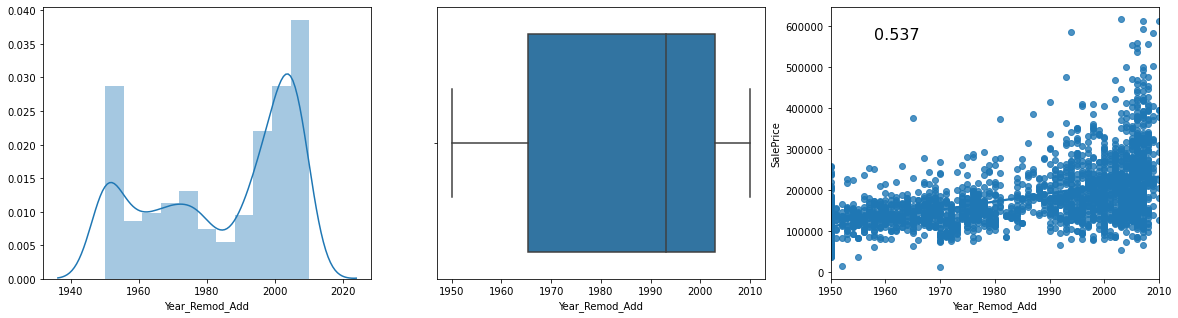

In [45]:
print(df_train.Year_Remod_Add.describe())
cor=df_train['Year_Remod_Add'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Year_Remod_Add, ax=ax1)
sns.boxplot(df_train.Year_Remod_Add, ax=ax2)
sns.regplot(x='Year_Remod_Add', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

__________________

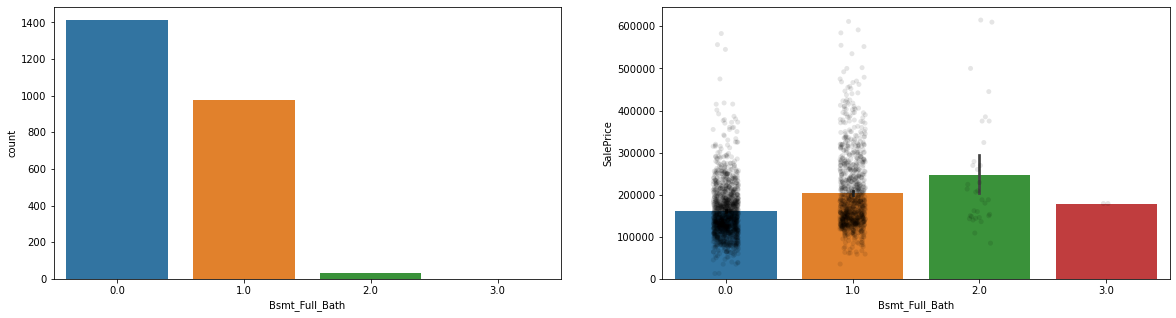

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Bsmt_Full_Bath", data=df_train, ax=ax1)
sns.barplot(x="Bsmt_Full_Bath", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Bsmt_Full_Bath", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

__________________

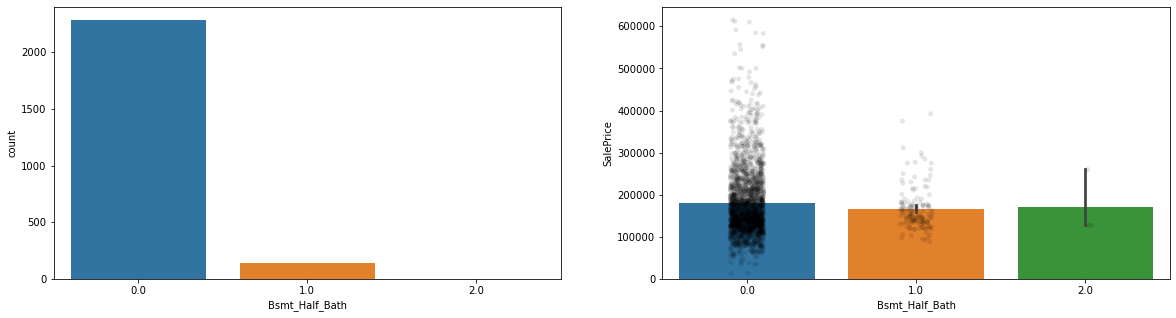

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Bsmt_Half_Bath", data=df_train, ax=ax1)
sns.barplot(x="Bsmt_Half_Bath", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Bsmt_Half_Bath", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

___________

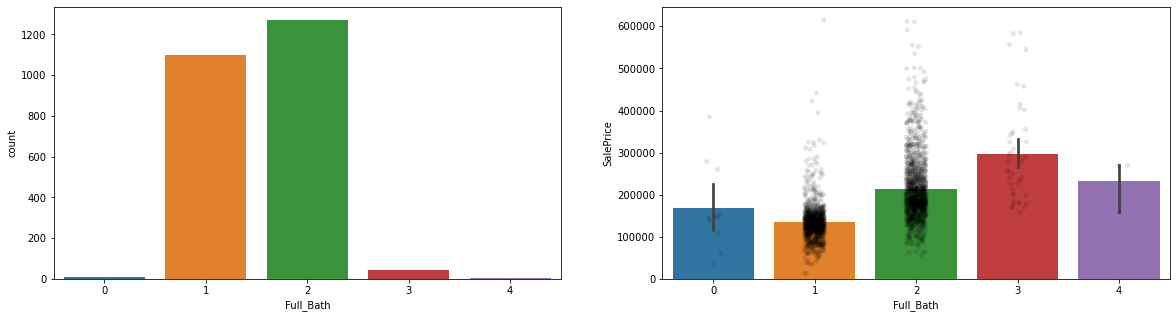

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Full_Bath", data=df_train, ax=ax1)
sns.barplot(x="Full_Bath", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Full_Bath", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

___________

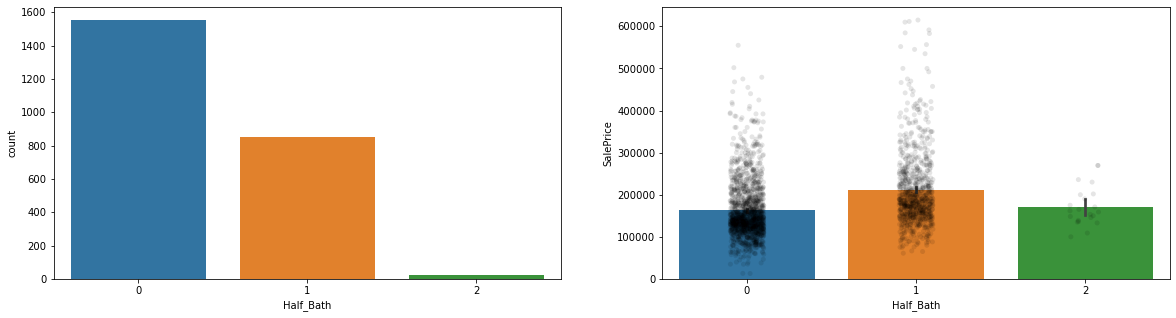

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Half_Bath", data=df_train, ax=ax1)
sns.barplot(x="Half_Bath", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Half_Bath", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

___________

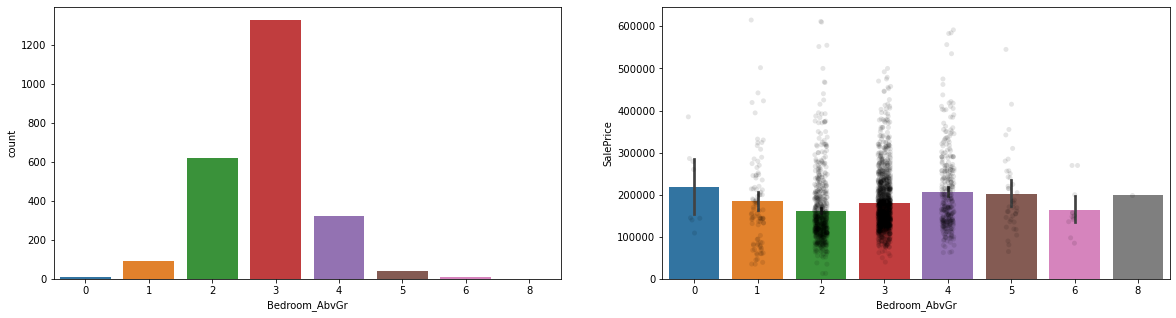

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Bedroom_AbvGr", data=df_train, ax=ax1)
sns.barplot(x="Bedroom_AbvGr", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Bedroom_AbvGr", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

___________

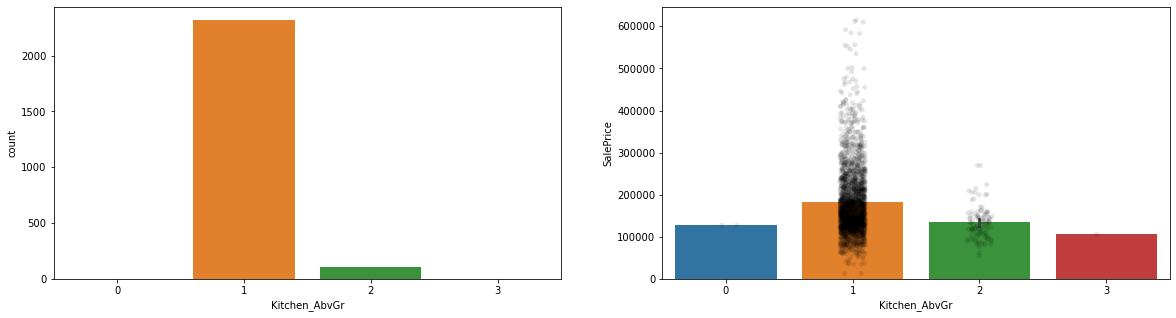

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Kitchen_AbvGr", data=df_train, ax=ax1)
sns.barplot(x="Kitchen_AbvGr", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Kitchen_AbvGr", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

___________

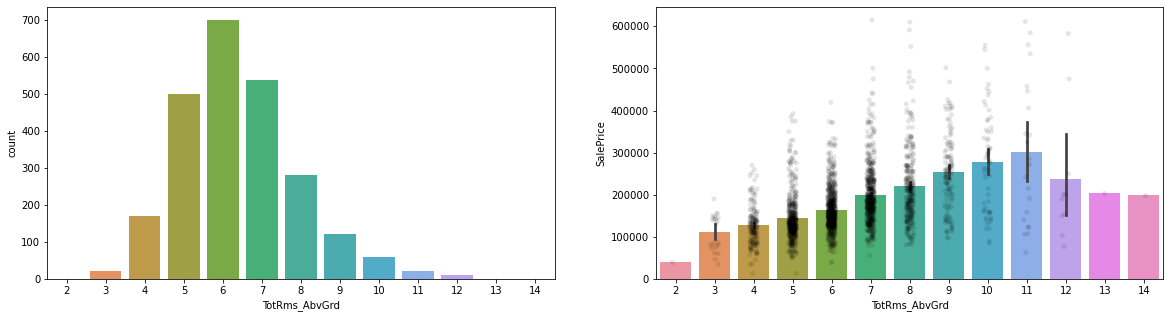

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="TotRms_AbvGrd", data=df_train, ax=ax1)
sns.barplot(x="TotRms_AbvGrd", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="TotRms_AbvGrd", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

__________

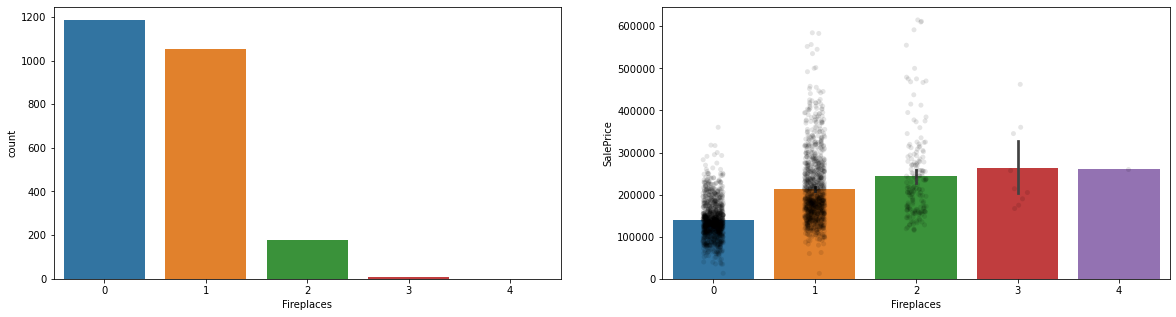

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Fireplaces", data=df_train, ax=ax1)
sns.barplot(x="Fireplaces", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Fireplaces", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

Looks like half of the houses do not have Fireplaces and the presence of Fireplaces visibly affects the SalePrice. This could be synthetically  presented as binary variable has_Fireplaces (0=no, 1=yes).

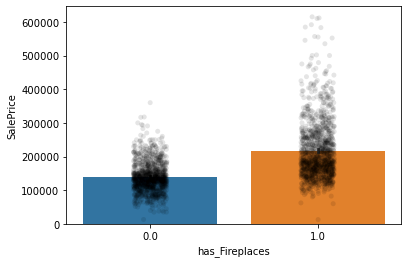

In [54]:
#create has_Fireplaces
#train
df_train.loc[df_train['Fireplaces'] == 0, 'has_Fireplaces'] = 0
df_train.loc[df_train['Fireplaces'] > 0, 'has_Fireplaces'] = 1 
#test
df_test.loc[df_test['Fireplaces'] == 0, 'has_Fireplaces'] = 0
df_test.loc[df_test['Fireplaces'] > 0, 'has_Fireplaces'] = 1 

#plot
sns.barplot(x="has_Fireplaces", y="SalePrice", data=df_train)
sns.stripplot(x="has_Fireplaces", y="SalePrice", data=df_train, color="0", alpha=.1);

__________

count    2426.000000
mean     1865.314097
std       458.868984
min         0.000000
25%      1957.000000
50%      1977.000000
75%      2001.000000
max      2207.000000
Name: Garage_Yr_Blt, dtype: float64


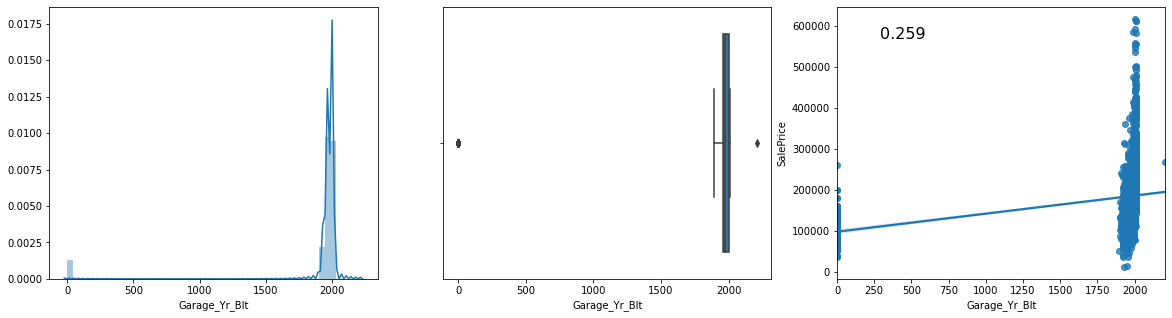

In [55]:
print(df_train.Garage_Yr_Blt.describe())
cor=df_train['Garage_Yr_Blt'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Garage_Yr_Blt, ax=ax1)
sns.boxplot(df_train.Garage_Yr_Blt, ax=ax2)
sns.regplot(x='Garage_Yr_Blt', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

There might be errors because the Year_Built max is 2010 according to the documentation txt.

In [56]:
df_train[df_train['Garage_Yr_Blt'] > 2010]

MS_SubClass MS_Zoning  Lot_Frontage  Lot_Area Street Alley  Lot_Shape  \
2219  dwelling_20        RL          68.0      8298   Pave  none          3   

     Land_Contour  Utilities Lot_Config  ...  Fence Misc_Feature Misc_Val  \
2219          HLS          4     Inside  ...    0.0         none        0   

     Mo_Sold Yr_Sold Sale_Type  Sale_Condition  SalePrice  year_built_tresh  \
2219       9    2007       New         Partial     267300          period_3   

      has_Fireplaces  
2219             1.0  

[1 rows x 82 columns]

In [57]:
 df_train=df_train[df_train['Garage_Yr_Blt'] < 2011] #1 row is deleted

In [58]:
 df_train.shape

(2425, 82)

Also, my initial idea of using the 0 as a way to fill the missing values is not appropriate (zeros fall far from the distribution). After checking the other variables I believe that one possibility is to use the Year_Built to have some sort of number which can stay in a reasonable range without creating inconsistencies.

In [59]:
#I do it both for the train and test dataframes
df_train['Garage_Yr_Blt'] = np.where(df_train['Garage_Yr_Blt'] == 0, df_train['Year_Built'], df_train['Garage_Yr_Blt'])
df_test['Garage_Yr_Blt'] = np.where(df_test['Garage_Yr_Blt'] == 0, df_test['Year_Built'], df_test['Garage_Yr_Blt'])

I check the graph again

count    2425.000000
mean     1975.813196
std        26.674904
min      1875.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: Garage_Yr_Blt, dtype: float64


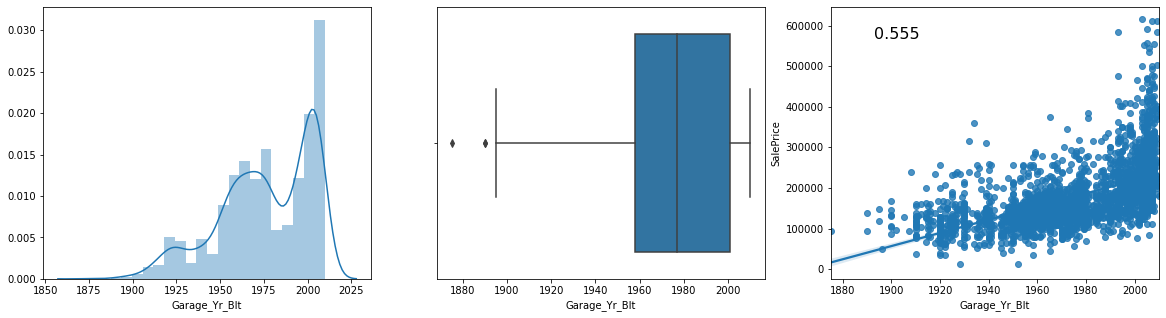

In [60]:
print(df_train.Garage_Yr_Blt.describe())
cor=df_train['Garage_Yr_Blt'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Garage_Yr_Blt, ax=ax1)
sns.boxplot(df_train.Garage_Yr_Blt, ax=ax2)
sns.regplot(x='Garage_Yr_Blt', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

________________

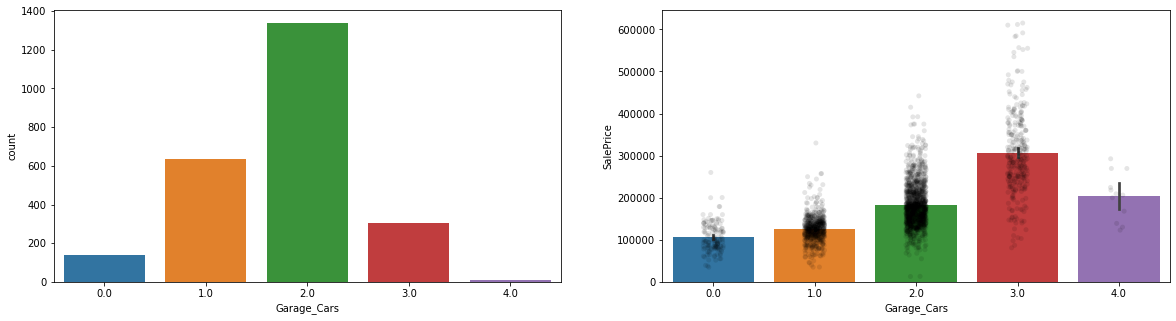

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Garage_Cars", data=df_train, ax=ax1)
sns.barplot(x="Garage_Cars", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Garage_Cars", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

This variable could also be presented has binary variable.

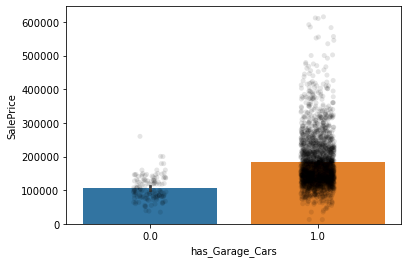

In [62]:
#has_Garage_Cars
#train
df_train.loc[df_train['Garage_Cars'] == 0, 'has_Garage_Cars'] = 0
df_train.loc[df_train['Garage_Cars'] > 0, 'has_Garage_Cars'] = 1 
#test
df_test.loc[df_test['Garage_Cars'] == 0, 'has_Garage_Cars'] = 0
df_test.loc[df_test['Garage_Cars'] > 0, 'has_Garage_Cars'] = 1 

#plot
sns.barplot(x="has_Garage_Cars", y="SalePrice", data=df_train)
sns.stripplot(x="has_Garage_Cars", y="SalePrice", data=df_train, color="0", alpha=.1);

______________

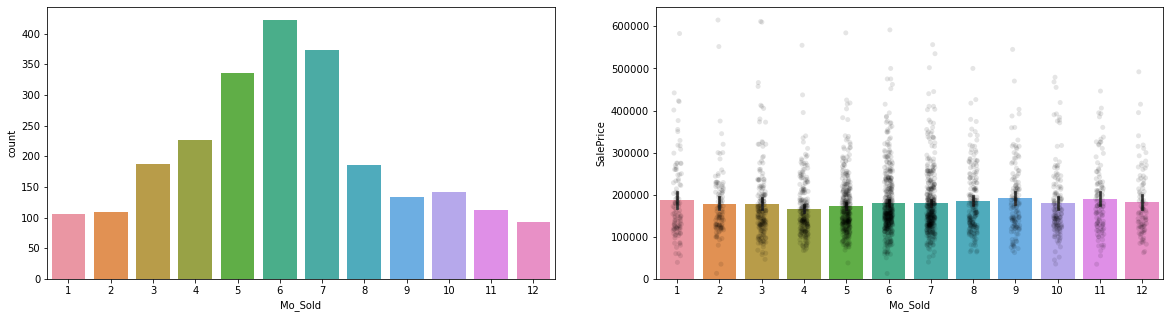

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Mo_Sold", data=df_train, ax=ax1)
sns.barplot(x="Mo_Sold", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Mo_Sold", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

______________

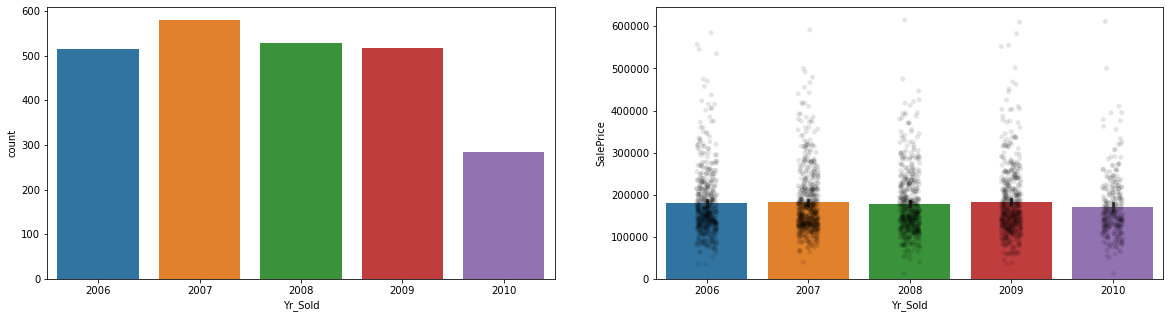

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.countplot(x="Yr_Sold", data=df_train, ax=ax1)
sns.barplot(x="Yr_Sold", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Yr_Sold", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

____________________
<h6><b>3.2. Continuous variables </b></h6>

___________________

count    2005.000000
mean       68.989027
std        22.734690
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot_Frontage, dtype: float64


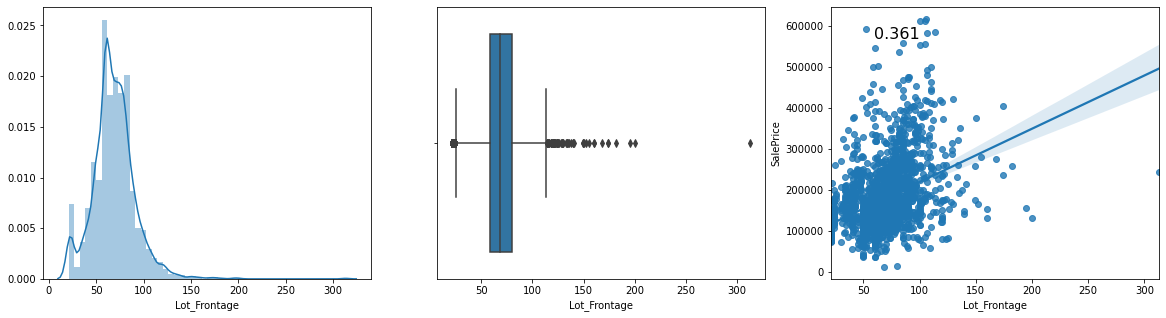

In [65]:
###this variable still contains missing values###

print(df_train.Lot_Frontage.describe())
cor=df_train['Lot_Frontage'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Lot_Frontage, ax=ax1)
sns.boxplot(df_train.Lot_Frontage, ax=ax2)
sns.regplot(x='Lot_Frontage', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

Here I see only 1 big outlier that must be worth discarding since it has huge Lot_Frontage but the price seems to be close to the mean SalePrice.

In [66]:
df_train = df_train[df_train['Lot_Frontage'] != 313] #1 row is deleted

In [67]:
df_train.shape

(2424, 83)

Now I can also fill the <b>missing values</b>. I will use the median value since it is more robuts. 

In [68]:
#df_train imputation
df_train['Lot_Frontage'].fillna((df_train['Lot_Frontage'].median()), inplace=True)

#df_test imputation (median from df_train)
df_test['Lot_Frontage'].fillna((df_train['Lot_Frontage'].median()), inplace=True)

I check again the plot

count    2424.000000
mean       68.716997
std        20.075074
min        21.000000
25%        60.000000
50%        68.000000
75%        78.000000
max       200.000000
Name: Lot_Frontage, dtype: float64


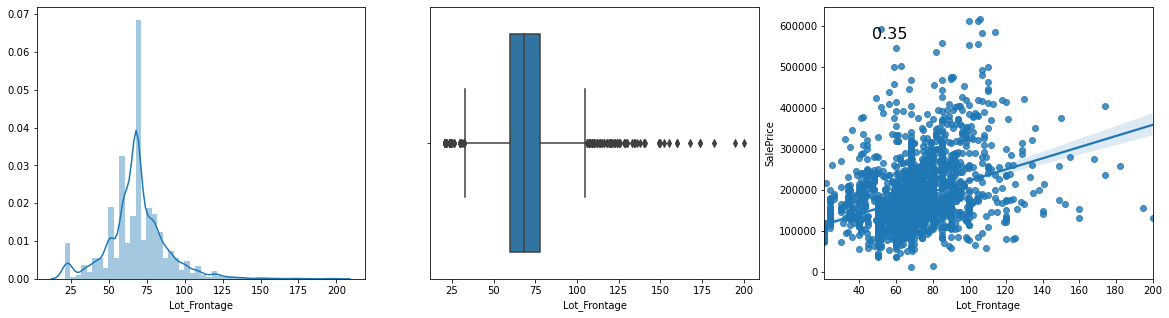

In [69]:
print(df_train.Lot_Frontage.describe())
cor=df_train['Lot_Frontage'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Lot_Frontage, ax=ax1)
sns.boxplot(df_train.Lot_Frontage, ax=ax2)
sns.regplot(x='Lot_Frontage', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

In [70]:
df_train.shape

(2424, 83)

This variable could could benefit from log transformation

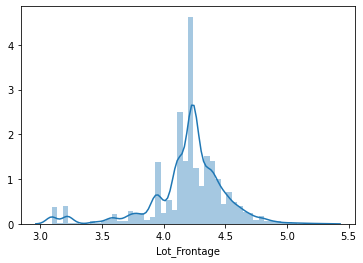

In [71]:
check= np.log1p(df_train.Lot_Frontage)
sns.distplot(check);

__________

count      2424.000000
mean      10196.188944
std        8260.244379
min        1470.000000
25%        7475.000000
50%        9491.000000
75%       11579.500000
max      215245.000000
Name: Lot_Area, dtype: float64


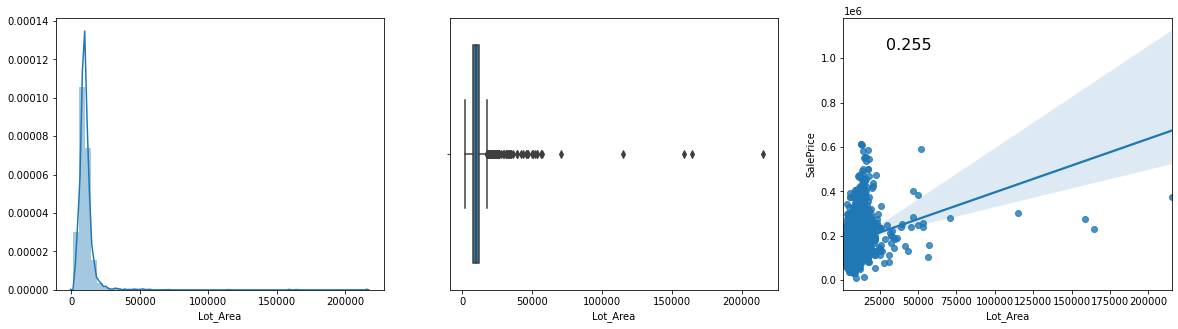

In [72]:
print(df_train.Lot_Area.describe())
cor=df_train['Lot_Area'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Lot_Area, ax=ax1)
sns.boxplot(df_train.Lot_Area, ax=ax2)
sns.regplot(x='Lot_Area', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

There are 4 values above 100000 that are quite far from the other values. I will remove those.

In [73]:
df_train = df_train[df_train['Lot_Area'] < 100000] #4 rows are deleted

In [74]:
df_train.shape

(2420, 83)

I check again the plot

count     2420.000000
mean      9942.771901
std       5227.684655
min       1470.000000
25%       7466.500000
50%       9487.500000
75%      11556.000000
max      70761.000000
Name: Lot_Area, dtype: float64


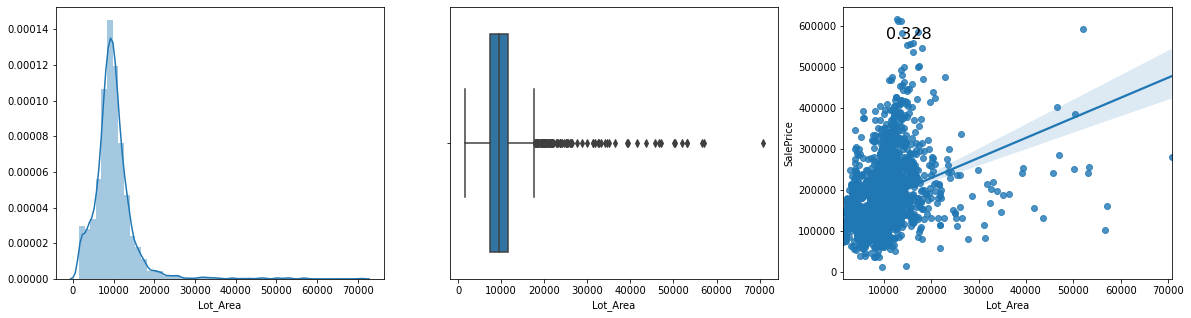

In [75]:
print(df_train.Lot_Area.describe())
cor=df_train['Lot_Area'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Lot_Area, ax=ax1)
sns.boxplot(df_train.Lot_Area, ax=ax2)
sns.regplot(x='Lot_Area', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

This variable might benefit from transformation

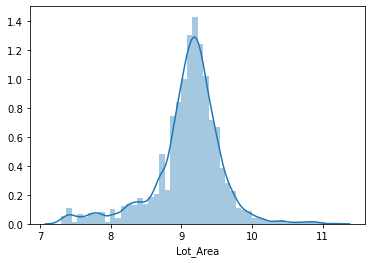

In [76]:
check=np.log1p(df_train.Lot_Area)
sns.distplot(check);

_____________

count    2420.000000
mean       99.406612
std       172.609764
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1600.000000
Name: Mas_Vnr_Area, dtype: float64


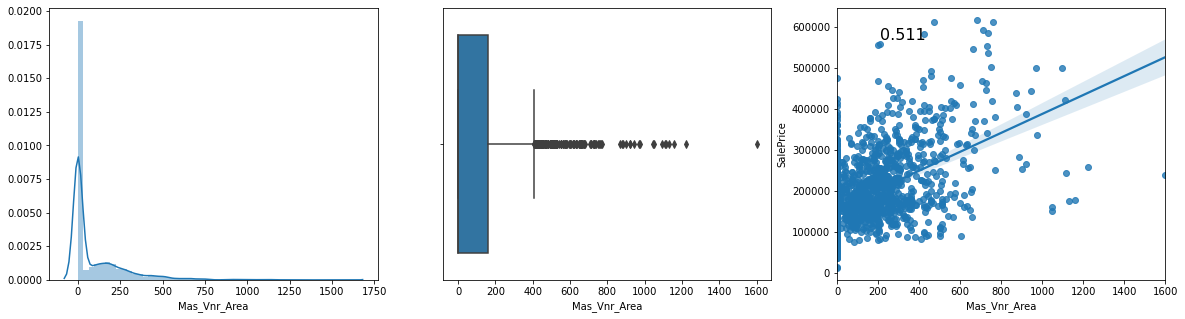

In [77]:
print(df_train.Mas_Vnr_Area.describe())
cor=df_train['Mas_Vnr_Area'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Mas_Vnr_Area, ax=ax1)
sns.boxplot(df_train.Mas_Vnr_Area, ax=ax2)
sns.regplot(x='Mas_Vnr_Area', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

In [78]:
df_train = df_train[df_train['Mas_Vnr_Area'] != 1600] #1 row is deleted
df_train.shape

(2419, 83)

I check again the plot

count    2419.000000
mean       98.786275
std       169.925896
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1224.000000
Name: Mas_Vnr_Area, dtype: float64


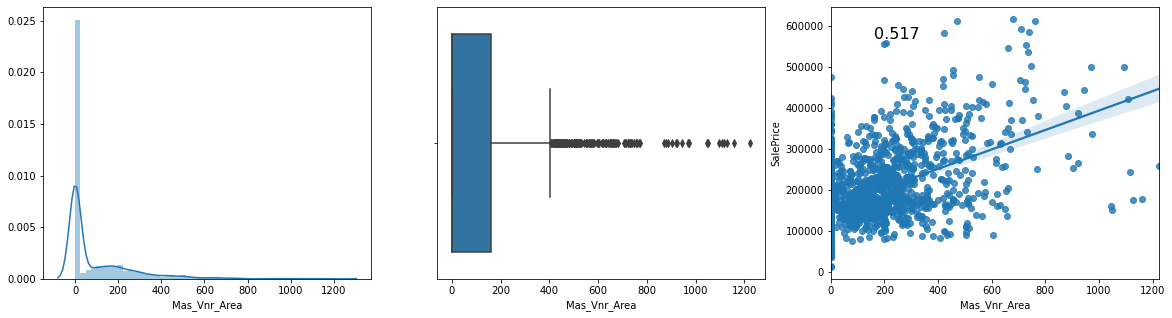

In [79]:
print(df_train.Mas_Vnr_Area.describe())
cor=df_train['Mas_Vnr_Area'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Mas_Vnr_Area, ax=ax1)
sns.boxplot(df_train.Mas_Vnr_Area, ax=ax2)
sns.regplot(x='Mas_Vnr_Area', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

__________

count    2419.000000
mean      437.816453
std       437.437480
min         0.000000
25%         0.000000
50%       371.000000
75%       734.500000
max      2288.000000
Name: BsmtFin_SF_1, dtype: float64


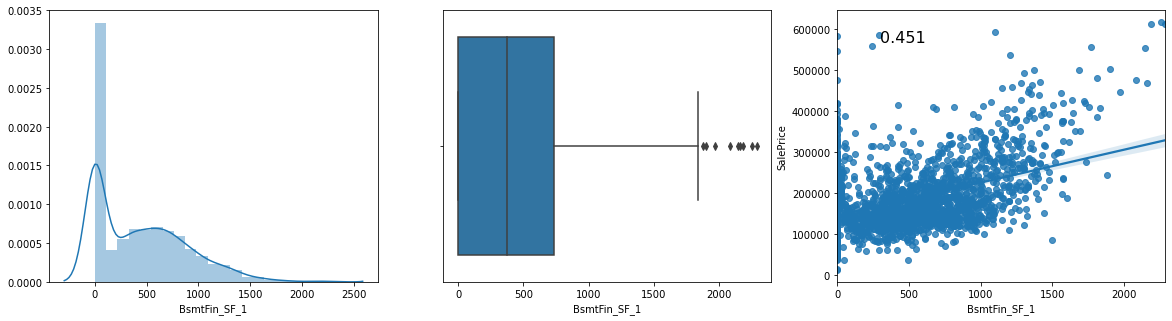

In [80]:
print(df_train.BsmtFin_SF_1.describe())
cor=df_train['BsmtFin_SF_1'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.BsmtFin_SF_1, ax=ax1)
sns.boxplot(df_train.BsmtFin_SF_1, ax=ax2)
sns.regplot(x='BsmtFin_SF_1', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

There is a big amount of zeros in this variable. I will try to plot it filtering out the zeros.

count     292.000000
mean      452.496575
std       335.404864
min        16.000000
25%       195.500000
50%       376.500000
75%       613.250000
max      1767.000000
Name: BsmtFin_SF_1, dtype: float64


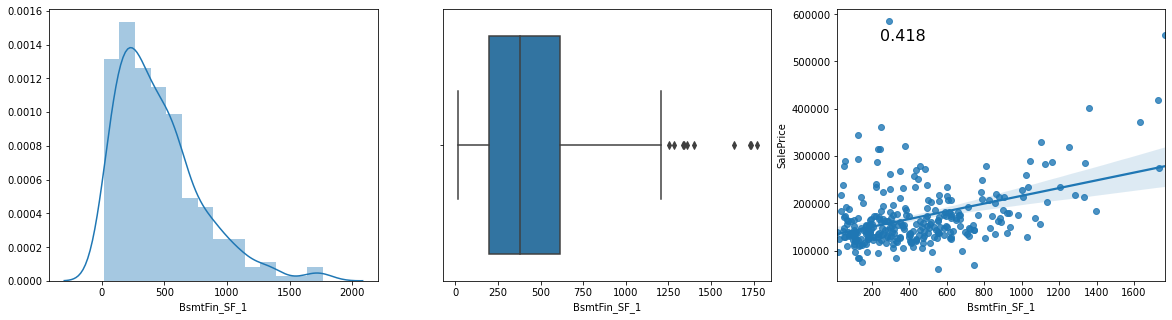

In [81]:
#data filter
BsmtFin_SF_1_filtered = df_train[df_train.BsmtFin_SF_2 != 0]

print(BsmtFin_SF_1_filtered.BsmtFin_SF_1.describe())
cor=BsmtFin_SF_1_filtered['BsmtFin_SF_1'].corr(BsmtFin_SF_1_filtered['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(BsmtFin_SF_1_filtered.BsmtFin_SF_1, ax=ax1)
sns.boxplot(BsmtFin_SF_1_filtered.BsmtFin_SF_1, ax=ax2)
sns.regplot(x='BsmtFin_SF_1', y='SalePrice', data=BsmtFin_SF_1_filtered, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

___________________

count    2419.000000
mean       50.885076
std       171.752597
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFin_SF_2, dtype: float64


C:\Users\matfr\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


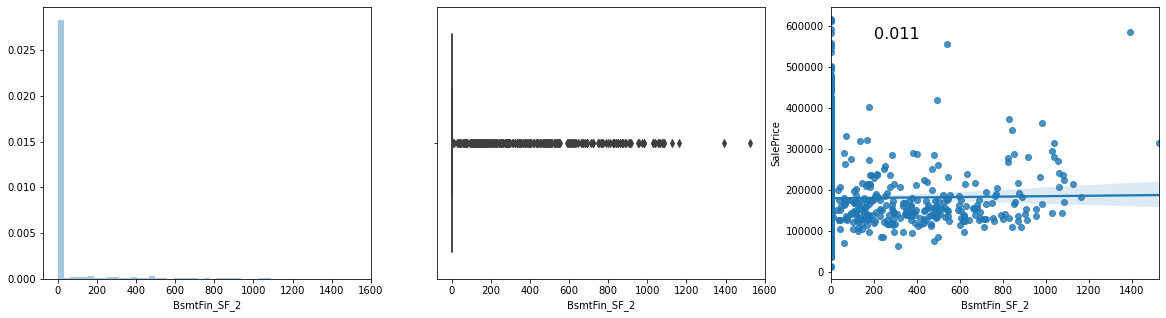

In [82]:
print(df_train.BsmtFin_SF_2.describe())
cor=df_train['BsmtFin_SF_2'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.BsmtFin_SF_2, ax=ax1)
sns.boxplot(df_train.BsmtFin_SF_2, ax=ax2)
sns.regplot(x='BsmtFin_SF_2', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

There big amount of zeros in this variable. I will try to plot it filtering out the zeros.

count     292.000000
mean      421.544521
std       297.201324
min         6.000000
25%       173.750000
50%       373.500000
75%       606.500000
max      1526.000000
Name: BsmtFin_SF_2, dtype: float64


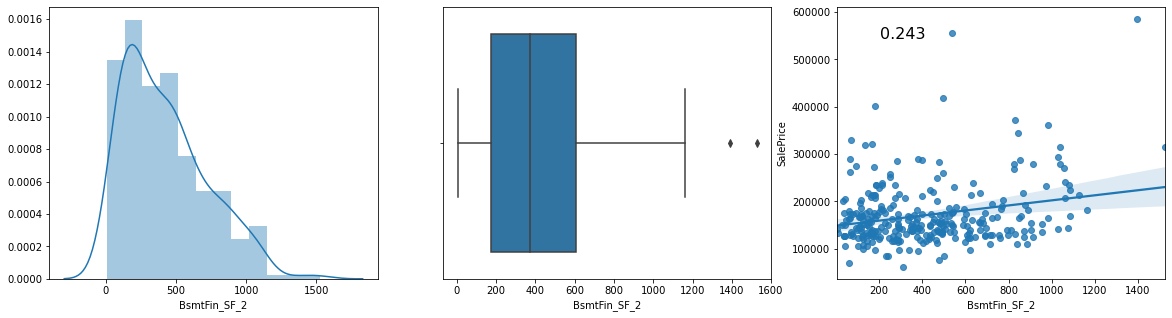

In [83]:
#data filter
xBsmtFin_SF_2_filtered = df_train[df_train.BsmtFin_SF_2 != 0]

print(xBsmtFin_SF_2_filtered.BsmtFin_SF_2.describe())
cor=xBsmtFin_SF_2_filtered['BsmtFin_SF_2'].corr(xBsmtFin_SF_2_filtered['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(xBsmtFin_SF_2_filtered.BsmtFin_SF_2, ax=ax1)
sns.boxplot(xBsmtFin_SF_2_filtered.BsmtFin_SF_2, ax=ax2)
sns.regplot(x='BsmtFin_SF_2', y='SalePrice', data=xBsmtFin_SF_2_filtered, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

_____________

count    2419.000000
mean      556.448532
std       440.045075
min         0.000000
25%       216.000000
50%       462.000000
75%       798.500000
max      2336.000000
Name: Bsmt_Unf_SF, dtype: float64


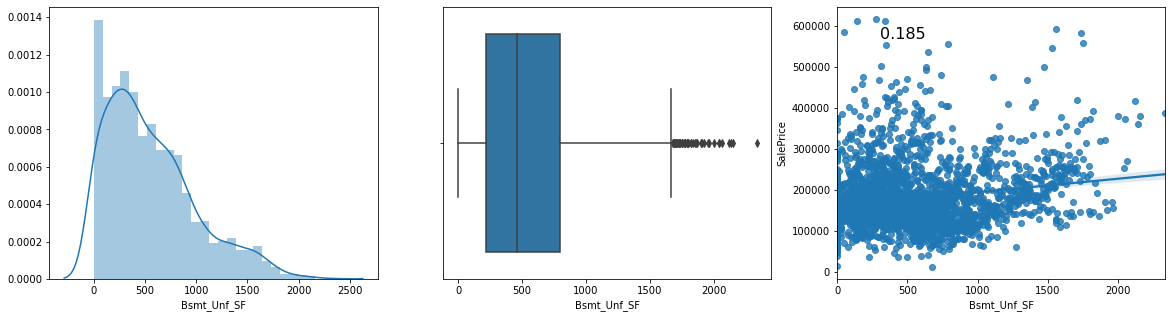

In [84]:
print(df_train.Bsmt_Unf_SF.describe())
cor=df_train['Bsmt_Unf_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Bsmt_Unf_SF, ax=ax1)
sns.boxplot(df_train.Bsmt_Unf_SF, ax=ax2)
sns.regplot(x='Bsmt_Unf_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

I plot the data filtering the 0 values

count    2208.000000
mean      609.623641
std       423.935226
min        14.000000
25%       279.000000
50%       520.000000
75%       835.250000
max      2336.000000
Name: Bsmt_Unf_SF, dtype: float64


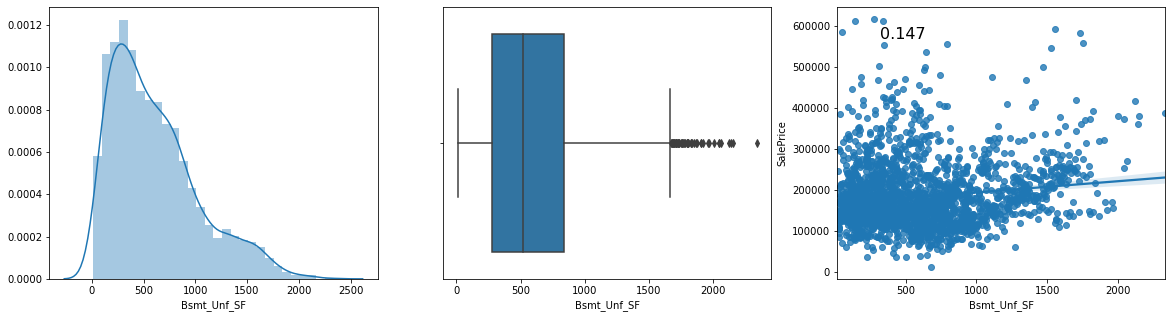

In [85]:
#data filter
Bsmt_Unf_SF_filter = df_train[df_train.Bsmt_Unf_SF != 0]

print(Bsmt_Unf_SF_filter.Bsmt_Unf_SF.describe())
cor=Bsmt_Unf_SF_filter['Bsmt_Unf_SF'].corr(Bsmt_Unf_SF_filter['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(Bsmt_Unf_SF_filter.Bsmt_Unf_SF, ax=ax1)
sns.boxplot(Bsmt_Unf_SF_filter.Bsmt_Unf_SF, ax=ax2)
sns.regplot(x='Bsmt_Unf_SF', y='SalePrice', data=Bsmt_Unf_SF_filter, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

___________

count    2419.000000
mean     1045.150062
std       423.224558
min         0.000000
25%       793.000000
50%       988.000000
75%      1295.500000
max      3206.000000
Name: Total_Bsmt_SF, dtype: float64


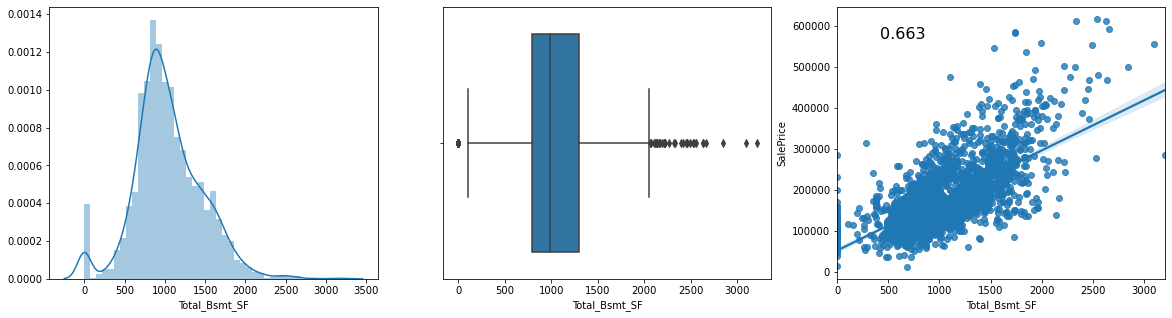

In [86]:
print(df_train.Total_Bsmt_SF.describe())
cor=df_train['Total_Bsmt_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Total_Bsmt_SF, ax=ax1)
sns.boxplot(df_train.Total_Bsmt_SF, ax=ax2)
sns.regplot(x='Total_Bsmt_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

I plot the data filtering the 0 values

count    2348.000000
mean     1076.753833
std       387.935104
min       105.000000
25%       813.000000
50%      1005.000000
75%      1309.250000
max      3206.000000
Name: Total_Bsmt_SF, dtype: float64


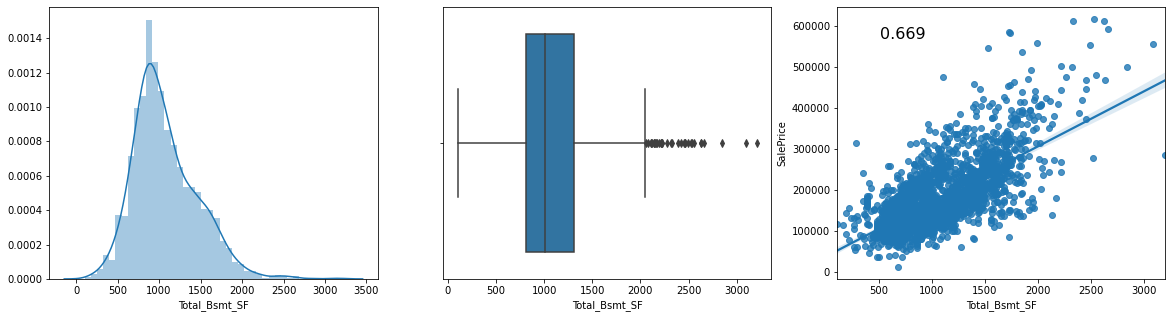

In [87]:
#data filter
Total_Bsmt_SF_filter = df_train[df_train.Total_Bsmt_SF != 0]

print(Total_Bsmt_SF_filter.Total_Bsmt_SF.describe())
cor=Total_Bsmt_SF_filter['Total_Bsmt_SF'].corr(Total_Bsmt_SF_filter['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(Total_Bsmt_SF_filter.Total_Bsmt_SF, ax=ax1)
sns.boxplot(Total_Bsmt_SF_filter.Total_Bsmt_SF, ax=ax2)
sns.regplot(x='Total_Bsmt_SF', y='SalePrice', data=Total_Bsmt_SF_filter, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

___________

count    2419.000000
mean     1154.299711
std       375.846560
min       334.000000
25%       880.000000
50%      1084.000000
75%      1382.000000
max      3820.000000
Name: first_Flr_SF, dtype: float64


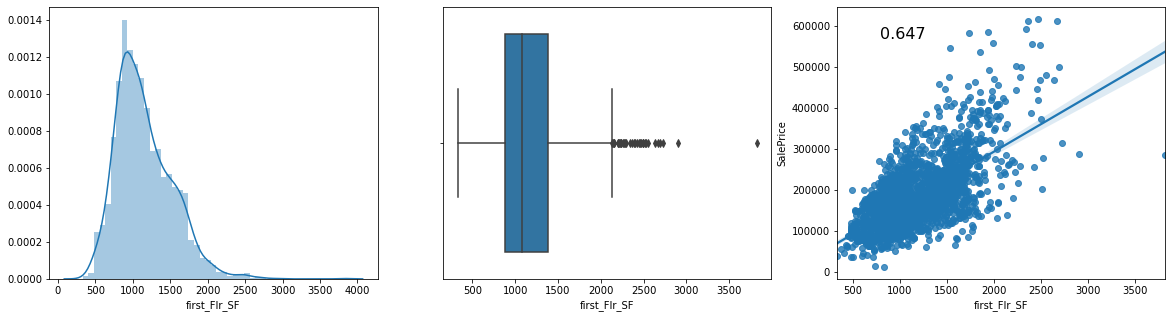

In [88]:
print(df_train.first_Flr_SF.describe())
cor=df_train['first_Flr_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.first_Flr_SF, ax=ax1)
sns.boxplot(df_train.first_Flr_SF, ax=ax2)
sns.regplot(x='first_Flr_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

The higher value for first_Flr_SF is quite far from the mean. I will remove it.

In [89]:
df_train = df_train[df_train['first_Flr_SF'] != 3820] #1 row is deleted
df_train.shape

(2418, 83)

I plot the data again

count    2418.000000
mean     1153.197270
std       371.991767
min       334.000000
25%       880.000000
50%      1084.000000
75%      1381.750000
max      2898.000000
Name: first_Flr_SF, dtype: float64


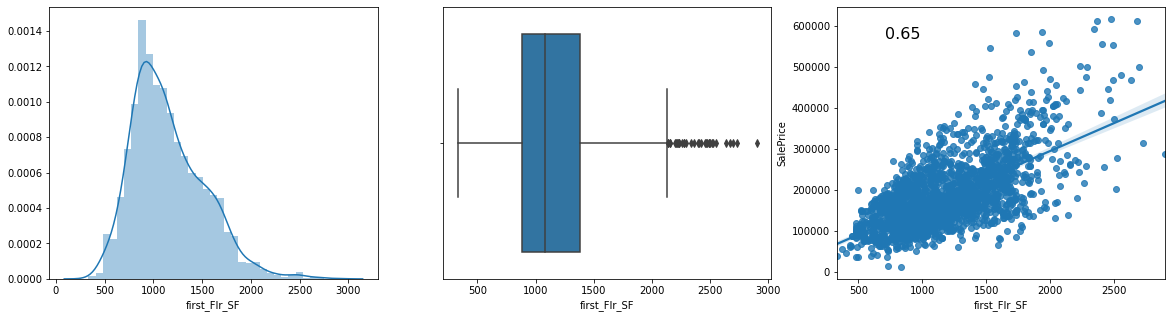

In [90]:
print(df_train.first_Flr_SF.describe())
cor=df_train['first_Flr_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.first_Flr_SF, ax=ax1)
sns.boxplot(df_train.first_Flr_SF, ax=ax2)
sns.regplot(x='first_Flr_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

This variable could benefit from log transformation

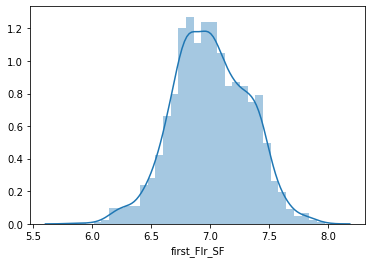

In [91]:
check= np.log1p(df_train.first_Flr_SF)
sns.distplot(check);

____________

count    2418.000000
mean      325.511166
std       417.059708
min         0.000000
25%         0.000000
50%         0.000000
75%       696.250000
max      1862.000000
Name: second_Flr_SF, dtype: float64


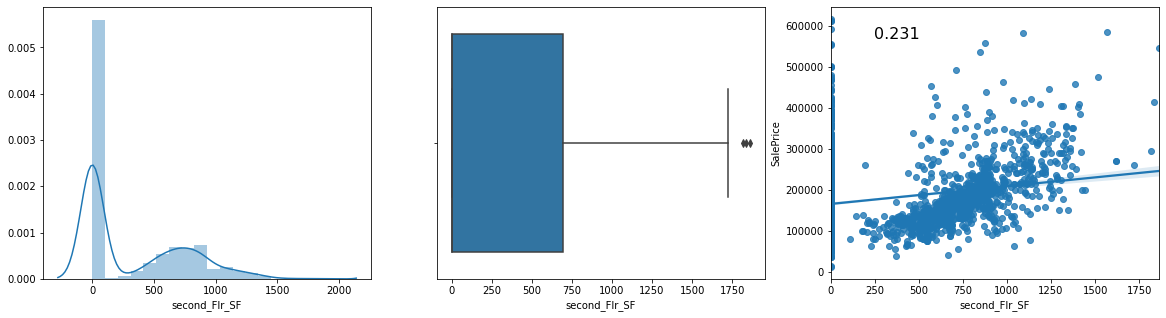

In [92]:
print(df_train.second_Flr_SF.describe())
cor=df_train['second_Flr_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.second_Flr_SF, ax=ax1)
sns.boxplot(df_train.second_Flr_SF, ax=ax2)
sns.regplot(x='second_Flr_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

count    1019.000000
mean      772.410206
std       259.707601
min       110.000000
25%       595.500000
50%       748.000000
75%       898.000000
max      1862.000000
Name: second_Flr_SF, dtype: float64


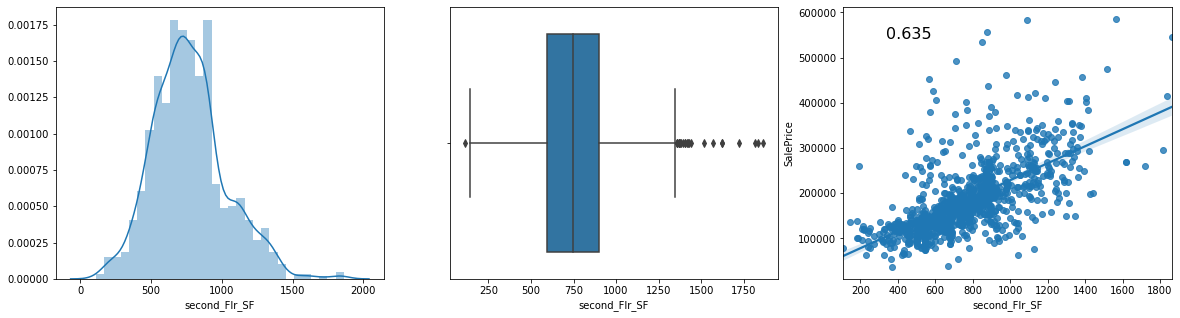

In [93]:
#data filter
second_Flr_SF_filter = df_train[df_train.second_Flr_SF != 0]

print(second_Flr_SF_filter.second_Flr_SF.describe())
cor=second_Flr_SF_filter['second_Flr_SF'].corr(second_Flr_SF_filter['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(second_Flr_SF_filter.second_Flr_SF, ax=ax1)
sns.boxplot(second_Flr_SF_filter.second_Flr_SF, ax=ax2)
sns.regplot(x='second_Flr_SF', y='SalePrice', data=second_Flr_SF_filter, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

___________

In [94]:
pd.DataFrame(df_train['Low_Qual_Fin_SF'].value_counts().head(5))#here I check only the values

Low_Qual_Fin_SF
0               2388
80                 2
515                1
108                1
120                1

_______

count    2418.000000
mean     1483.318031
std       474.354166
min       334.000000
25%      1118.250000
50%      1436.000000
75%      1735.500000
max      3672.000000
Name: Gr_Liv_Area, dtype: float64


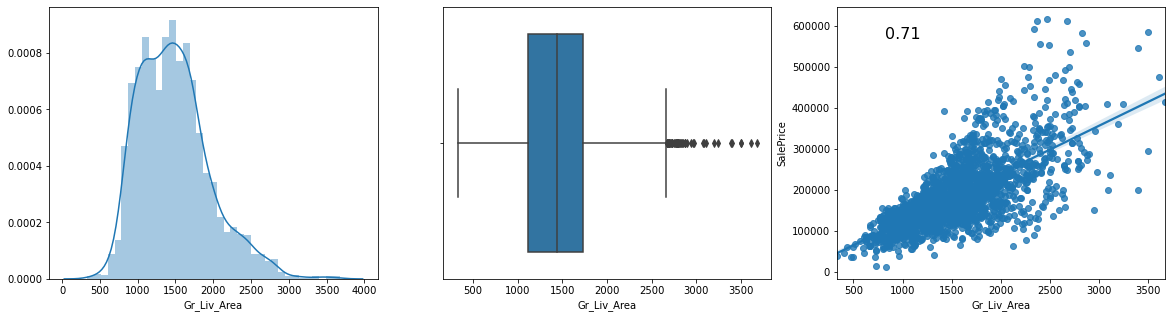

In [95]:
print(df_train.Gr_Liv_Area.describe())
cor=df_train['Gr_Liv_Area'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Gr_Liv_Area, ax=ax1)
sns.boxplot(df_train.Gr_Liv_Area, ax=ax2)
sns.regplot(x='Gr_Liv_Area', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

This variable could benefit from log transformation

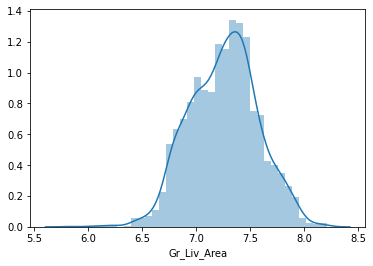

In [96]:
check=np.log1p(df_train.Gr_Liv_Area)
sns.distplot(check);

_____________

count    2418.000000
mean      470.423490
std       214.998691
min         0.000000
25%       320.000000
50%       478.000000
75%       576.000000
max      1488.000000
Name: Garage_Area, dtype: float64


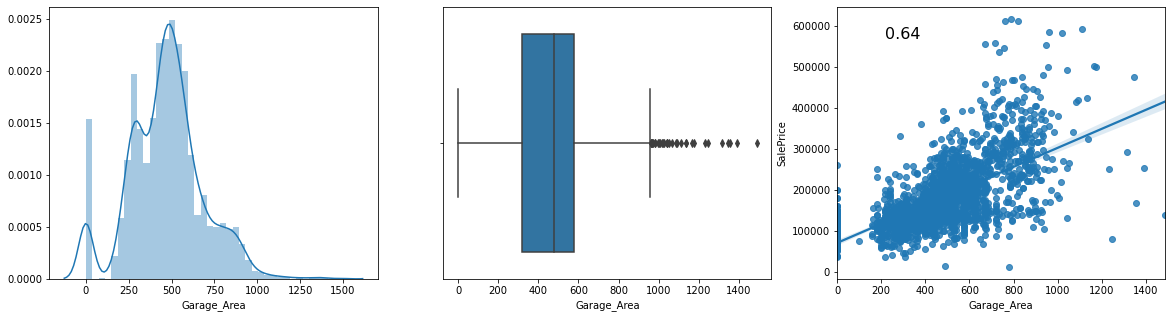

In [97]:
print(df_train.Garage_Area.describe())
cor=df_train['Garage_Area'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Garage_Area, ax=ax1)
sns.boxplot(df_train.Garage_Area, ax=ax2)
sns.regplot(x='Garage_Area', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

I check the plot without zeros

count    2280.000000
mean      498.896491
std       186.580134
min       100.000000
25%       365.750000
50%       484.000000
75%       580.000000
max      1488.000000
Name: Garage_Area, dtype: float64


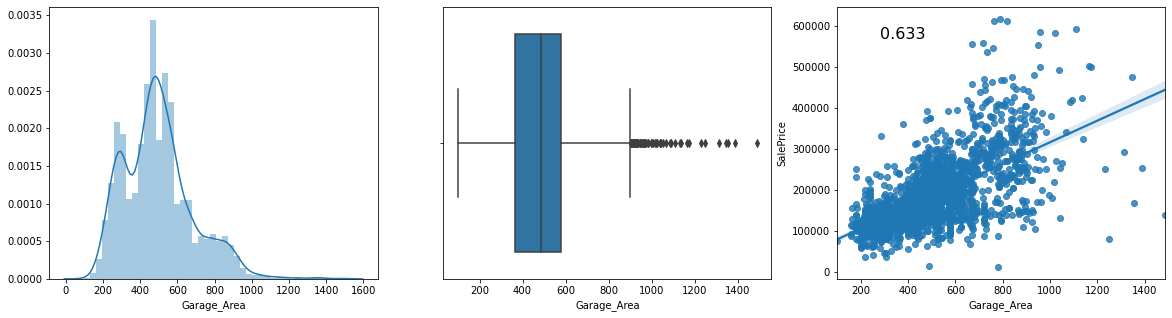

In [98]:
#data filter
Garage_Area_filter = df_train[df_train.Garage_Area != 0]

print(Garage_Area_filter.Garage_Area.describe())
cor=Garage_Area_filter['Garage_Area'].corr(Garage_Area_filter['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(Garage_Area_filter.Garage_Area, ax=ax1)
sns.boxplot(Garage_Area_filter.Garage_Area, ax=ax2)
sns.regplot(x='Garage_Area', y='SalePrice', data=Garage_Area_filter, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

_______________

count    2418.000000
mean       93.351944
std       127.181810
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood_Deck_SF, dtype: float64


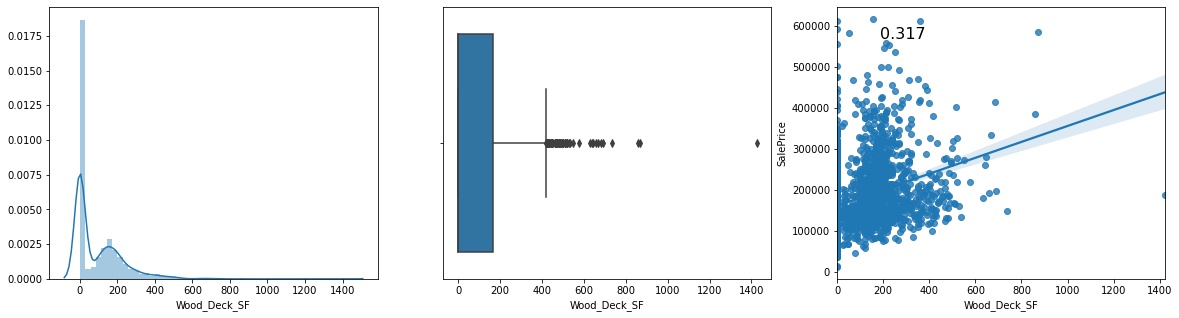

In [99]:
print(df_train.Wood_Deck_SF.describe())
cor=df_train['Wood_Deck_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Wood_Deck_SF, ax=ax1)
sns.boxplot(df_train.Wood_Deck_SF, ax=ax2)
sns.regplot(x='Wood_Deck_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

There is one big outlier. I will remove it.

In [100]:
df_train = df_train[df_train['Wood_Deck_SF'] != 1424] #1 row is deleted
df_train.shape

(2417, 83)

I check again the plot

count    2417.000000
mean       92.801407
std       124.292922
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       870.000000
Name: Wood_Deck_SF, dtype: float64


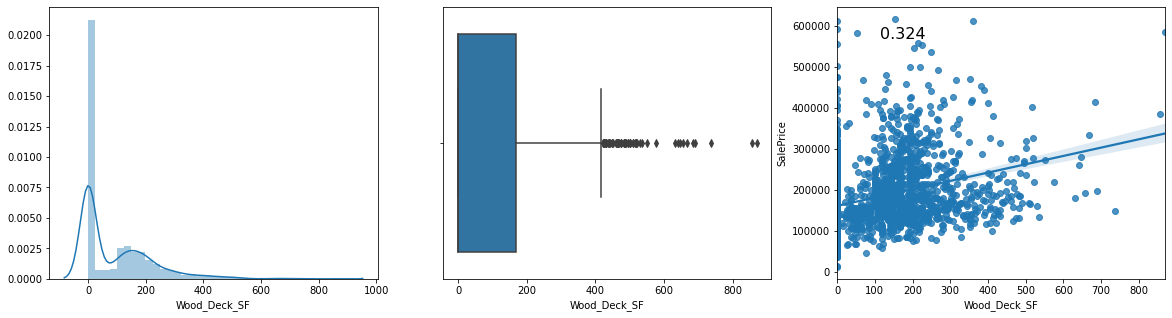

In [101]:
print(df_train.Wood_Deck_SF.describe())
cor=df_train['Wood_Deck_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Wood_Deck_SF, ax=ax1)
sns.boxplot(df_train.Wood_Deck_SF, ax=ax2)
sns.regplot(x='Wood_Deck_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

____________

count    2417.000000
mean       46.752586
std        66.148151
min         0.000000
25%         0.000000
50%        27.000000
75%        69.000000
max       742.000000
Name: Open_Porch_SF, dtype: float64


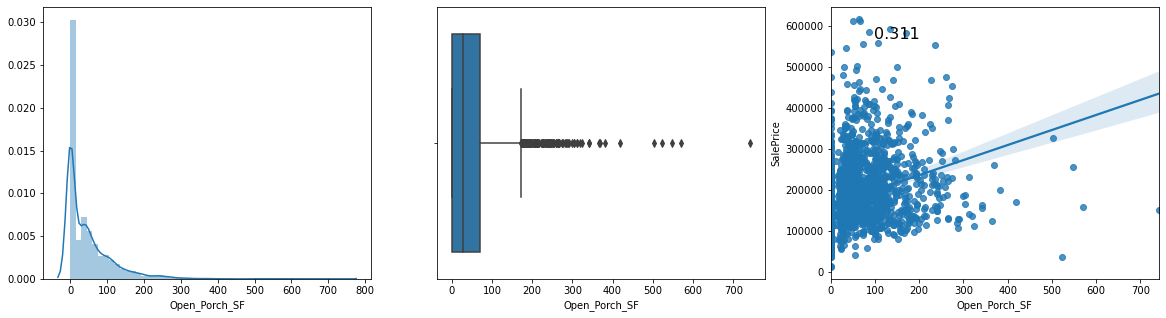

In [102]:
print(df_train.Open_Porch_SF.describe())
cor=df_train['Open_Porch_SF'].corr(df_train['SalePrice'])#correlation with SalePrice
cor= round(cor, 3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.distplot(df_train.Open_Porch_SF, ax=ax1)
sns.boxplot(df_train.Open_Porch_SF, ax=ax2)
sns.regplot(x='Open_Porch_SF', y='SalePrice', data=df_train, ax=ax3)
ax3.text(0.2, 0.9, cor, horizontalalignment='center', fontsize=16, verticalalignment='center', transform=ax3.transAxes);

__________

In [103]:
pd.DataFrame(df_train['Enclosed_Porch'].value_counts().head(5))#here I check only the values

Enclosed_Porch
0              2042
112              21
96               10
192              10
144               9

Only a few cases have an Enclosed_Porch. I create a binary variable to check its influence on prices.

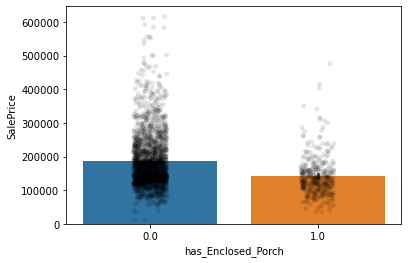

In [104]:
#create has_Enclosed_Porch
#train
df_train.loc[df_train['Enclosed_Porch'] == 0, 'has_Enclosed_Porch'] = 0
df_train.loc[df_train['Enclosed_Porch'] > 0, 'has_Enclosed_Porch'] = 1 
#test
df_test.loc[df_test['Enclosed_Porch'] == 0, 'has_Enclosed_Porch'] = 0
df_test.loc[df_test['Enclosed_Porch'] > 0, 'has_Enclosed_Porch'] = 1 

#plot
sns.barplot(x="has_Enclosed_Porch", y="SalePrice", data=df_train)
sns.stripplot(x="has_Enclosed_Porch", y="SalePrice", data=df_train, color="0", alpha=.1);

___________

In [105]:
pd.DataFrame(df_train['threeSsn_Porch'].value_counts().head(5))#here I check only the values

threeSsn_Porch
0              2388
168               3
153               2
144               2
180               2

I create a binary variable also for this feature

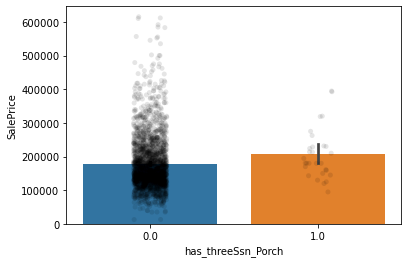

In [106]:
#create has_threeSsn_Porch
#train
df_train.loc[df_train['threeSsn_Porch'] == 0, 'has_threeSsn_Porch'] = 0
df_train.loc[df_train['threeSsn_Porch'] > 0, 'has_threeSsn_Porch'] = 1 
#test
df_test.loc[df_test['threeSsn_Porch'] == 0, 'has_threeSsn_Porch'] = 0
df_test.loc[df_test['threeSsn_Porch'] > 0, 'has_threeSsn_Porch'] = 1 

#plot
sns.barplot(x="has_threeSsn_Porch", y="SalePrice", data=df_train)
sns.stripplot(x="has_threeSsn_Porch", y="SalePrice", data=df_train, color="0", alpha=.1);

_____________

In [107]:
pd.DataFrame(df_train['Screen_Porch'].value_counts().head(5))#here I check only the values

Screen_Porch
0            2200
144            11
168            10
192             8
180             7

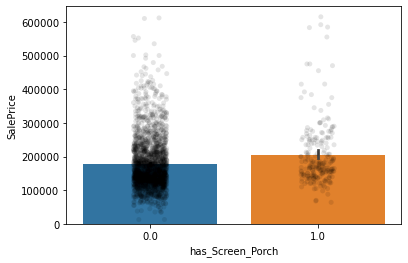

In [108]:
#create has_Screen_Porch
#train
df_train.loc[df_train['Screen_Porch'] == 0, 'has_Screen_Porch'] = 0
df_train.loc[df_train['Screen_Porch'] > 0, 'has_Screen_Porch'] = 1 
#test
df_test.loc[df_test['Screen_Porch'] == 0, 'has_Screen_Porch'] = 0
df_test.loc[df_test['Screen_Porch'] > 0, 'has_Screen_Porch'] = 1 

#plot
sns.barplot(x="has_Screen_Porch", y="SalePrice", data=df_train)
sns.stripplot(x="has_Screen_Porch", y="SalePrice", data=df_train, color="0", alpha=.1);

___________

In [109]:
pd.DataFrame(df_train['Pool_Area'].value_counts().head(5))#here I check only the values

Pool_Area
0         2407
561          1
519          1
800          1
648          1

I create the binary feature has_Pool_Area

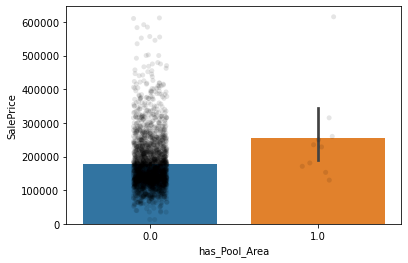

In [110]:
#create has_Pool_Area
#train
df_train.loc[df_train['Pool_Area'] == 0, 'has_Pool_Area'] = 0
df_train.loc[df_train['Pool_Area'] > 0, 'has_Pool_Area'] = 1 
#test
df_test.loc[df_test['Pool_Area'] == 0, 'has_Pool_Area'] = 0
df_test.loc[df_test['Pool_Area'] > 0, 'has_Pool_Area'] = 1 

#plot
sns.barplot(x="has_Pool_Area", y="SalePrice", data=df_train)
sns.stripplot(x="has_Pool_Area", y="SalePrice", data=df_train, color="0", alpha=.1);

____________

In [111]:
pd.DataFrame(df_train['Misc_Val'].value_counts().head(5))#here I check only the values

Misc_Val
0        2332
400        15
500        10
600         8
450         7

I create the binary feature has_Misc_Val

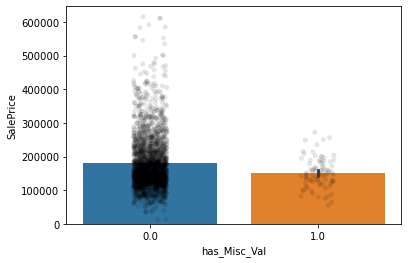

In [112]:
#create has_Misc_Val
#train
df_train.loc[df_train['Misc_Val'] == 0, 'has_Misc_Val'] = 0
df_train.loc[df_train['Misc_Val'] > 0, 'has_Misc_Val'] = 1 
#test
df_test.loc[df_test['Misc_Val'] == 0, 'has_Misc_Val'] = 0
df_test.loc[df_test['Misc_Val'] > 0, 'has_Misc_Val'] = 1 

#plot
sns.barplot(x="has_Misc_Val", y="SalePrice", data=df_train)
sns.stripplot(x="has_Misc_Val", y="SalePrice", data=df_train, color="0", alpha=.1);

_______________

count      2417.000000
mean     179411.441043
std       77874.625025
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      213000.000000
max      615000.000000
Name: SalePrice, dtype: float64


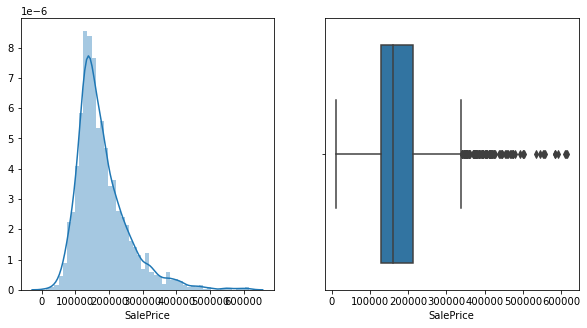

In [113]:
print(df_train.SalePrice.describe())
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.distplot(df_train.SalePrice, ax=ax1)
sns.boxplot(df_train.SalePrice, ax=ax2);

This variable could benefit from log transformation

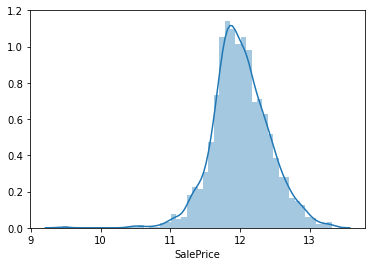

In [114]:
check=np.log1p(df_train.SalePrice)
sns.distplot(check);

____________________
<h6><b>3.3. Ordinal variables</b></h6>

___________________

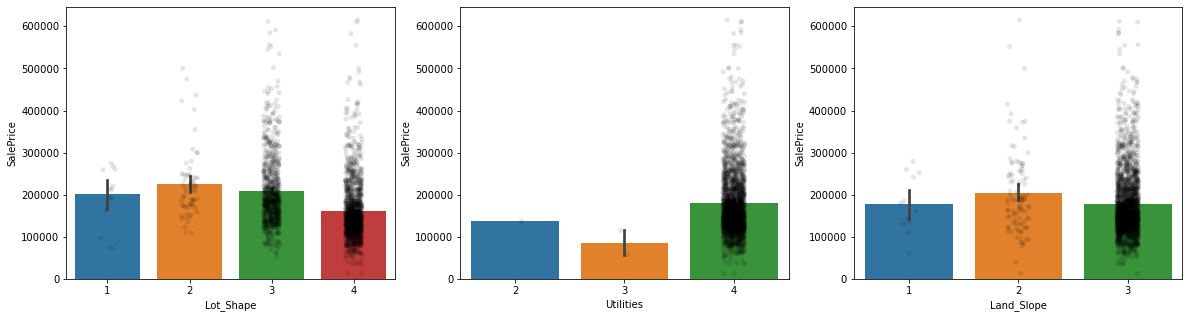

In [115]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.barplot(x="Lot_Shape", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Lot_Shape", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="Utilities", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Utilities", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2)

sns.barplot(x="Land_Slope", y="SalePrice", data=df_train, ax=ax3)
sns.stripplot(x="Land_Slope", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax3);

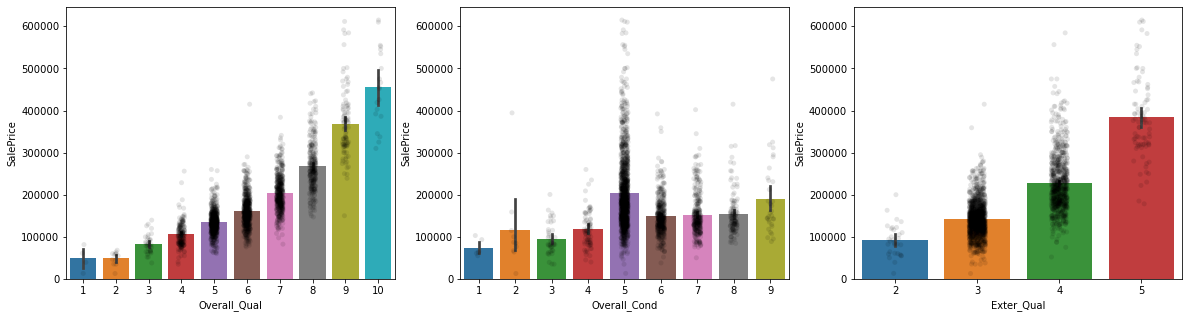

In [116]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.barplot(x="Overall_Qual", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Overall_Qual", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="Overall_Cond", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Overall_Cond", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2)

sns.barplot(x="Exter_Qual", y="SalePrice", data=df_train, ax=ax3)
sns.stripplot(x="Exter_Qual", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax3);

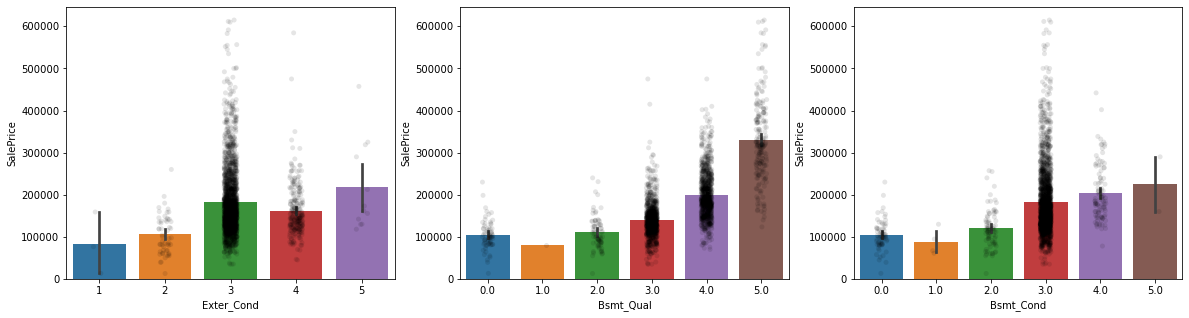

In [117]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.barplot(x="Exter_Cond", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Exter_Cond", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="Bsmt_Qual", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Bsmt_Qual", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2)

sns.barplot(x="Bsmt_Cond", y="SalePrice", data=df_train, ax=ax3)
sns.stripplot(x="Bsmt_Cond", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax3);

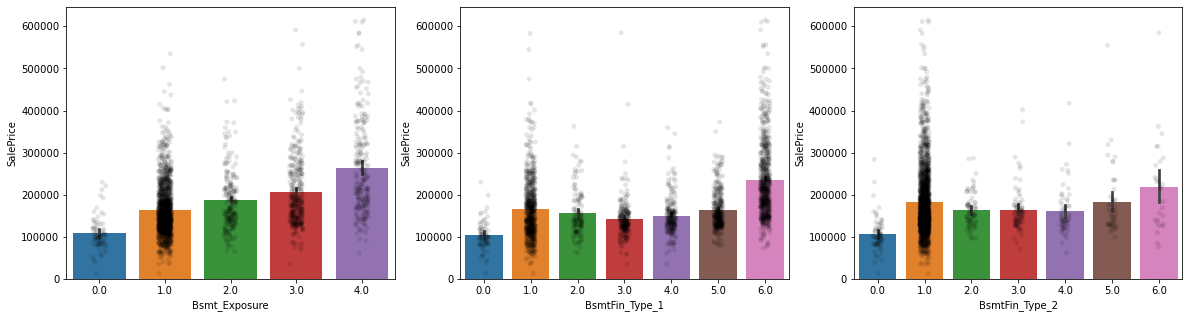

In [118]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.barplot(x="Bsmt_Exposure", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Bsmt_Exposure", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="BsmtFin_Type_1", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="BsmtFin_Type_1", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2)

sns.barplot(x="BsmtFin_Type_2", y="SalePrice", data=df_train, ax=ax3)
sns.stripplot(x="BsmtFin_Type_2", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax3);

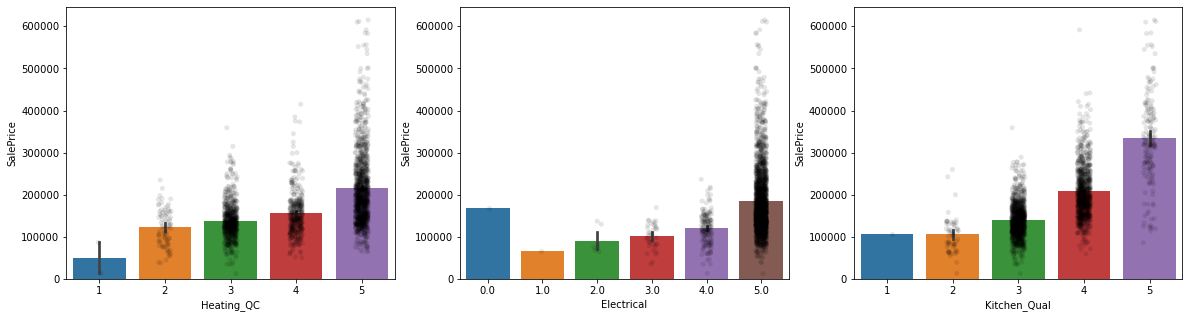

In [119]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.barplot(x="Heating_QC", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Heating_QC", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="Electrical", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Electrical", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2)

sns.barplot(x="Kitchen_Qual", y="SalePrice", data=df_train, ax=ax3)
sns.stripplot(x="Kitchen_Qual", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax3);

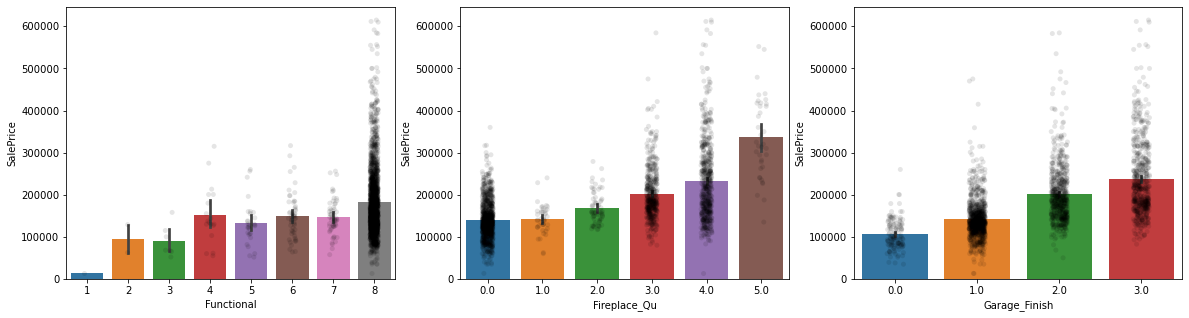

In [120]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.barplot(x="Functional", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Functional", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="Fireplace_Qu", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Fireplace_Qu", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2)

sns.barplot(x="Garage_Finish", y="SalePrice", data=df_train, ax=ax3)
sns.stripplot(x="Garage_Finish", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax3);

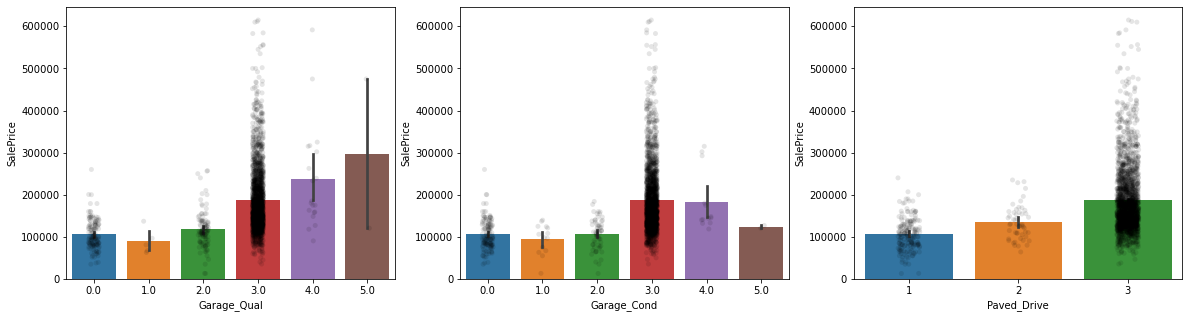

In [121]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.barplot(x="Garage_Qual", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Garage_Qual", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="Garage_Cond", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Garage_Cond", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2)

sns.barplot(x="Paved_Drive", y="SalePrice", data=df_train, ax=ax3)
sns.stripplot(x="Paved_Drive", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax3);

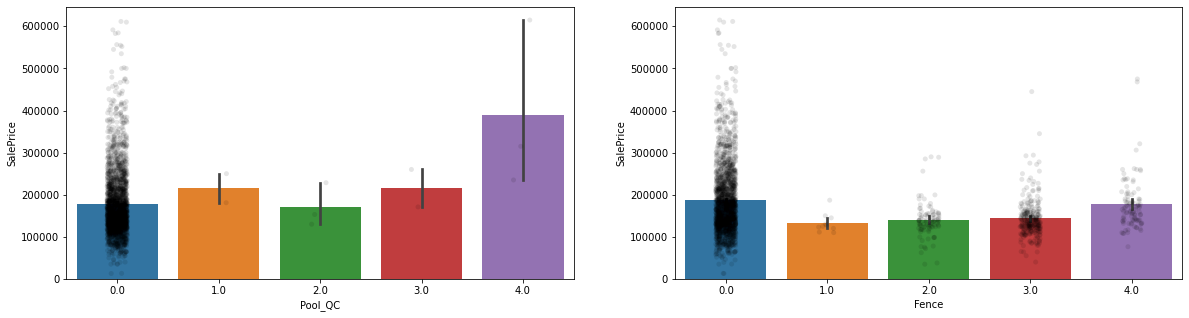

In [122]:
#plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
sns.barplot(x="Pool_QC", y="SalePrice", data=df_train, ax=ax1)
sns.stripplot(x="Pool_QC", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax1)

sns.barplot(x="Fence", y="SalePrice", data=df_train, ax=ax2)
sns.stripplot(x="Fence", y="SalePrice", data=df_train, color="0", alpha=.1, ax=ax2);

____________________
<h6><b>3.4. Categorical variables</b></h6>

___________________

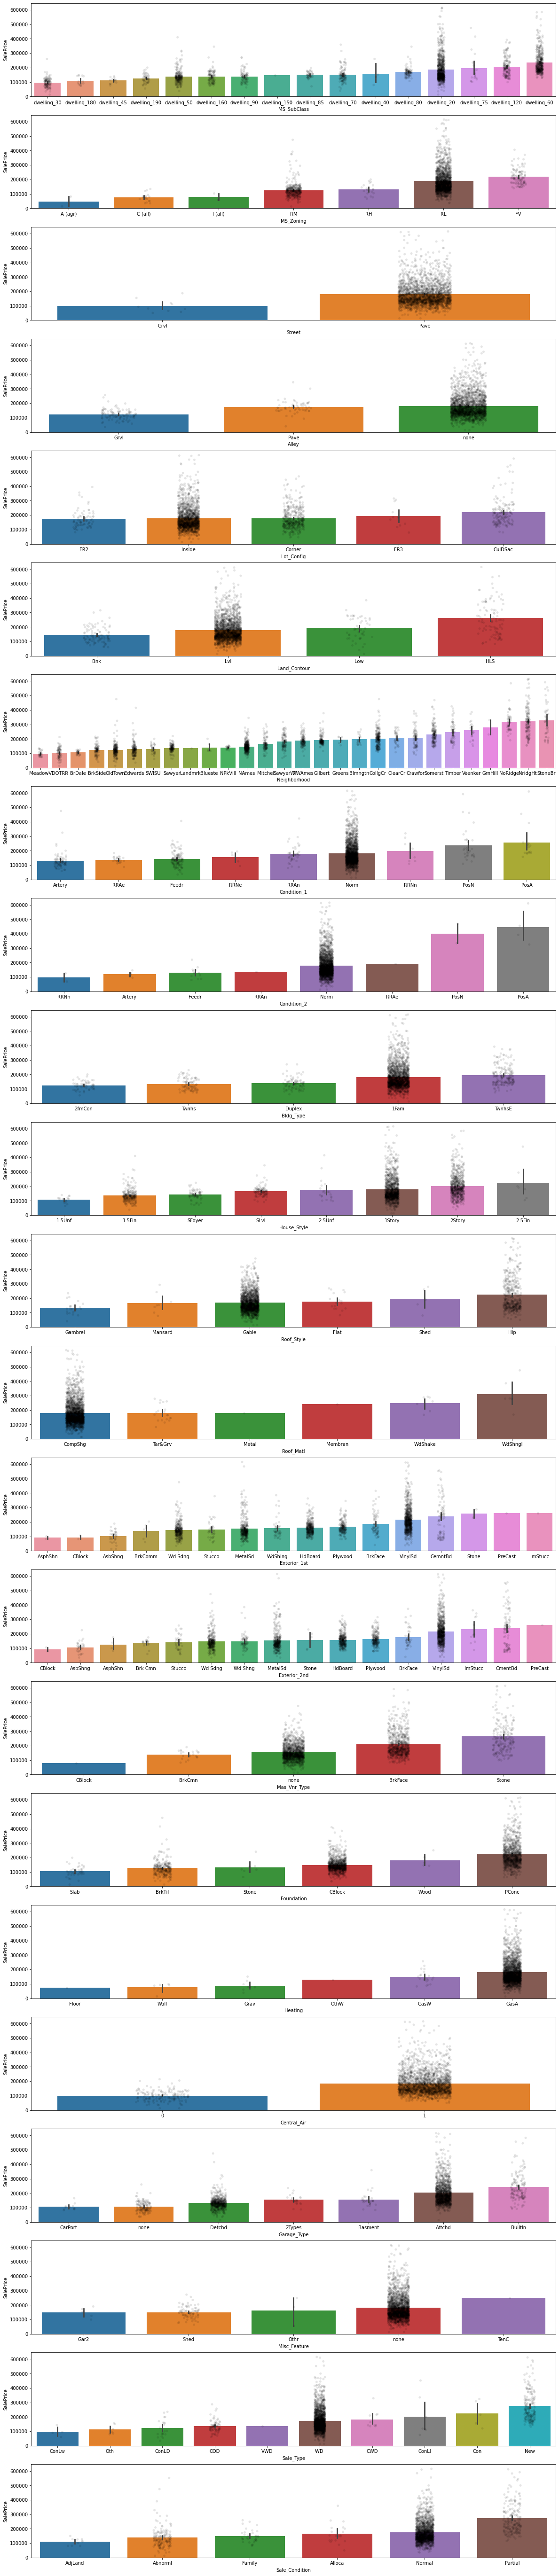

In [123]:
#plot
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, 
      ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20,
      ax21, ax22, ax23) = plt.subplots(nrows=23, ncols=1, figsize=(20,100))

order1 = df_train.groupby(["MS_SubClass"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')#first create an ascending order for each variable
sns.barplot(x="MS_SubClass", y="SalePrice", data=df_train, order=order1['MS_SubClass'],  ax=ax1)
sns.stripplot(x="MS_SubClass", y="SalePrice", data=df_train, color="0", alpha=.1, order=order1['MS_SubClass'],  ax=ax1)

order2 = df_train.groupby(["MS_Zoning"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="MS_Zoning", y="SalePrice", data=df_train, order=order2['MS_Zoning'], ax=ax2)
sns.stripplot(x="MS_Zoning", y="SalePrice", data=df_train, color="0", alpha=.1, order=order2['MS_Zoning'], ax=ax2)

order3 = df_train.groupby(["Street"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Street", y="SalePrice", data=df_train, order=order3['Street'], ax=ax3)
sns.stripplot(x="Street", y="SalePrice", data=df_train, color="0", alpha=.1, order=order3['Street'], ax=ax3)

order4 = df_train.groupby(["Alley"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Alley", y="SalePrice", data=df_train, order=order4['Alley'], ax=ax4)
sns.stripplot(x="Alley", y="SalePrice", data=df_train, color="0", alpha=.1, order=order4['Alley'], ax=ax4)

order5 = df_train.groupby(["Lot_Config"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Lot_Config", y="SalePrice", data=df_train, order=order5['Lot_Config'], ax=ax5)
sns.stripplot(x="Lot_Config", y="SalePrice", data=df_train, color="0", alpha=.1, order=order5['Lot_Config'], ax=ax5)

order6 = df_train.groupby(["Land_Contour"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Land_Contour", y="SalePrice", data=df_train, order=order6['Land_Contour'], ax=ax6)
sns.stripplot(x="Land_Contour", y="SalePrice", data=df_train, color="0", alpha=.1, order=order6['Land_Contour'], ax=ax6)

order7 = df_train.groupby(["Neighborhood"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Neighborhood", y="SalePrice", data=df_train, order=order7['Neighborhood'], ax=ax7)
sns.stripplot(x="Neighborhood", y="SalePrice", data=df_train, color="0", alpha=.1, order=order7['Neighborhood'], ax=ax7)

order8 = df_train.groupby(["Condition_1"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Condition_1", y="SalePrice", data=df_train, order=order8['Condition_1'], ax=ax8)
sns.stripplot(x="Condition_1", y="SalePrice", data=df_train, color="0", alpha=.1, order=order8['Condition_1'], ax=ax8)

order9 = df_train.groupby(["Condition_2"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Condition_2", y="SalePrice", data=df_train, order=order9['Condition_2'], ax=ax9)
sns.stripplot(x="Condition_2", y="SalePrice", data=df_train, color="0", alpha=.1, order=order9['Condition_2'], ax=ax9)

order10 = df_train.groupby(["Bldg_Type"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Bldg_Type", y="SalePrice", data=df_train, order=order10['Bldg_Type'], ax=ax10)
sns.stripplot(x="Bldg_Type", y="SalePrice", data=df_train, color="0", alpha=.1, order=order10['Bldg_Type'], ax=ax10)

order11 = df_train.groupby(["House_Style"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="House_Style", y="SalePrice", data=df_train, order=order11['House_Style'], ax=ax11)
sns.stripplot(x="House_Style", y="SalePrice", data=df_train, color="0", alpha=.1, order=order11['House_Style'], ax=ax11)

order12 = df_train.groupby(["Roof_Style"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Roof_Style", y="SalePrice", data=df_train, order=order12['Roof_Style'], ax=ax12)
sns.stripplot(x="Roof_Style", y="SalePrice", data=df_train, color="0", alpha=.1, order=order12['Roof_Style'], ax=ax12)

order13 = df_train.groupby(["Roof_Matl"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Roof_Matl", y="SalePrice", data=df_train, order=order13['Roof_Matl'], ax=ax13)
sns.stripplot(x="Roof_Matl", y="SalePrice", data=df_train, color="0", alpha=.1, order=order13['Roof_Matl'], ax=ax13)

order14 = df_train.groupby(["Exterior_1st"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Exterior_1st", y="SalePrice", data=df_train, order=order14['Exterior_1st'], ax=ax14)
sns.stripplot(x="Exterior_1st", y="SalePrice", data=df_train, color="0", alpha=.1, order=order14['Exterior_1st'], ax=ax14)

order15 = df_train.groupby(["Exterior_2nd"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Exterior_2nd", y="SalePrice", data=df_train, order=order15['Exterior_2nd'], ax=ax15)
sns.stripplot(x="Exterior_2nd", y="SalePrice", data=df_train, color="0", alpha=.1, order=order15['Exterior_2nd'], ax=ax15)

order16 = df_train.groupby(["Mas_Vnr_Type"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Mas_Vnr_Type", y="SalePrice", data=df_train, order=order16['Mas_Vnr_Type'], ax=ax16)
sns.stripplot(x="Mas_Vnr_Type", y="SalePrice", data=df_train, color="0", alpha=.1, order=order16['Mas_Vnr_Type'], ax=ax16)

order17 = df_train.groupby(["Foundation"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Foundation", y="SalePrice", data=df_train, order=order17['Foundation'], ax=ax17)
sns.stripplot(x="Foundation", y="SalePrice", data=df_train, color="0", alpha=.1, order=order17['Foundation'], ax=ax17)

order18 = df_train.groupby(["Heating"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Heating", y="SalePrice", data=df_train, order=order18['Heating'], ax=ax18)
sns.stripplot(x="Heating", y="SalePrice", data=df_train, color="0", alpha=.1, order=order18['Heating'], ax=ax18)

order19 = df_train.groupby(["Central_Air"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Central_Air", y="SalePrice", data=df_train, order=order19['Central_Air'], ax=ax19)
sns.stripplot(x="Central_Air", y="SalePrice", data=df_train, color="0", alpha=.1, order=order19['Central_Air'], ax=ax19)

order20 = df_train.groupby(["Garage_Type"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Garage_Type", y="SalePrice", data=df_train, order=order20['Garage_Type'], ax=ax20)
sns.stripplot(x="Garage_Type", y="SalePrice", data=df_train, color="0", alpha=.1, order=order20['Garage_Type'], ax=ax20)

order21 = df_train.groupby(["Misc_Feature"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Misc_Feature", y="SalePrice", data=df_train, order=order21['Misc_Feature'], ax=ax21)
sns.stripplot(x="Misc_Feature", y="SalePrice", data=df_train, color="0", alpha=.1, order=order21['Misc_Feature'], ax=ax21)

order22 = df_train.groupby(["Sale_Type"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Sale_Type", y="SalePrice", data=df_train, order=order22['Sale_Type'], ax=ax22)
sns.stripplot(x="Sale_Type", y="SalePrice", data=df_train, color="0", alpha=.1, order=order22['Sale_Type'], ax=ax22)

order23 = df_train.groupby(["Sale_Condition"])['SalePrice'].aggregate(np.mean).reset_index().sort_values('SalePrice')
sns.barplot(x="Sale_Condition", y="SalePrice", data=df_train, order=order23['Sale_Condition'], ax=ax23)
sns.stripplot(x="Sale_Condition", y="SalePrice", data=df_train, color="0", alpha=.1, order=order23['Sale_Condition'], ax=ax23);

After I decide to create a binary feature from MS_Zoning based on the purpose of the building (residential/business).

In [124]:
#create MS_Zoning_binary
### train ###
#business
df_train.loc[df_train['MS_Zoning'] == 'RL', 'MS_Zoning_binary'] = 'residential'
df_train.loc[df_train['MS_Zoning'] == 'RM', 'MS_Zoning_binary'] = 'residential'
df_train.loc[df_train['MS_Zoning'] == 'FV', 'MS_Zoning_binary'] = 'residential'
df_train.loc[df_train['MS_Zoning'] == 'RH', 'MS_Zoning_binary'] = 'residential'
df_train.loc[df_train['MS_Zoning'] == 'RP', 'MS_Zoning_binary'] = 'residential' #this category is not present in the train data but it might br present in the test data
#residential
df_train.loc[df_train['MS_Zoning'] == 'I (all)', 'MS_Zoning_binary'] = 'business'
df_train.loc[df_train['MS_Zoning'] == 'C (all)', 'MS_Zoning_binary'] = 'business'
df_train.loc[df_train['MS_Zoning'] == 'A (agr)', 'MS_Zoning_binary'] = 'business'

### test ###
#business
df_test.loc[df_test['MS_Zoning'] == 'RL', 'MS_Zoning_binary'] = 'residential'
df_test.loc[df_test['MS_Zoning'] == 'RM', 'MS_Zoning_binary'] = 'residential'
df_test.loc[df_test['MS_Zoning'] == 'FV', 'MS_Zoning_binary'] = 'residential'
df_test.loc[df_test['MS_Zoning'] == 'RH', 'MS_Zoning_binary'] = 'residential'
df_test.loc[df_test['MS_Zoning'] == 'RP', 'MS_Zoning_binary'] = 'residential' 
#residential
df_test.loc[df_test['MS_Zoning'] == 'I (all)', 'MS_Zoning_binary'] = 'business'
df_test.loc[df_test['MS_Zoning'] == 'C (all)', 'MS_Zoning_binary'] = 'business'
df_test.loc[df_test['MS_Zoning'] == 'A (agr)', 'MS_Zoning_binary'] = 'business'

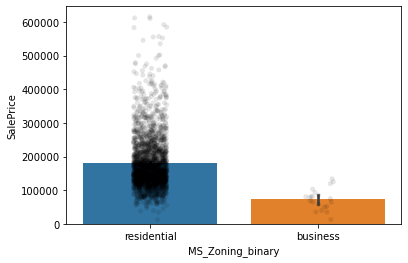

In [125]:
#plot
sns.barplot(x="MS_Zoning_binary", y="SalePrice", data=df_train)
sns.stripplot(x="MS_Zoning_binary", y="SalePrice", data=df_train, color="0", alpha=.1);

Another feature that might be interesting is the presence of a basement (0=no/1=yes)

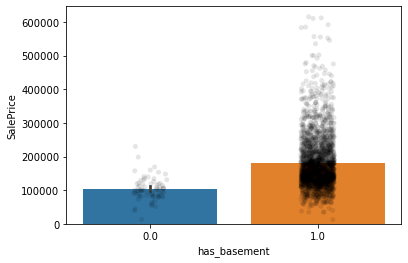

In [126]:
#I use one of the ordinal variables with value = 0 indicating no basement (Bsmt_Qual)

#create has_basement
#test
df_train.loc[df_train['Bsmt_Qual'] == 0, 'has_basement'] = 0
df_train.loc[df_train['Bsmt_Qual'] > 0, 'has_basement'] = 1 
#train
df_test.loc[df_test['Bsmt_Qual'] == 0, 'has_basement'] = 0
df_test.loc[df_test['Bsmt_Qual'] > 0, 'has_basement'] = 1 

#plot
sns.barplot(x="has_basement", y="SalePrice", data=df_train)
sns.stripplot(x="has_basement", y="SalePrice", data=df_train, color="0", alpha=.1);

_____________________
<h3><b>4. Machine Learning</b></h3>

_____________________

<h6><b>4.1. Detailed procedure</b></h6>

___________________

<br><b>Procedure</b></br>
- The idea is to use a <b>ridge regression</b> for the models because most of the features are probably collinear (several features refer to the same factors e.g. basement, garage, etc...).
- The <b>test/train split</b> will be 80/20 since it returns 484 rows for the y_test(validation), which is close to the number of rows (500) that I have to predict for the df_test.
- The following features will be <b>log transformed</b> when present in the train df: Lot_Frontage, Lot_Area, Gr_Liv_Area, first_Flr_SF.
- The <b>target y</b> will be log-transformed to avoid biasing the results toward high prices.
- The model will be fitted using <b>scikit-learn pipelines</b>, specifically for one-hot encoding (OneHotEncoder), feature scaling (StandardScaler), regression (Ridge), and y target transformation (TransformedTargetRegressor).
- Models will be presented using the MAE <b>cost function</b> (in $) and their comparison with the median baseline.
- <b>Regularization</b> with grid search is adopted for the complex model.

_____________________
<h6><b>4.2. Simple model (2 variables) </b></h6>

___________________

For the simple model, I choose Year_Built & Gr_Liv_Area considering their positive correlation with SalePrice. Furthermore, those 2 features are present for all the properties in the dataframe (i.e. no 0 values). Another important aspect is that the correlation between those features is not excessive (i.e. no collinear issues without regularization).

r: 0.241


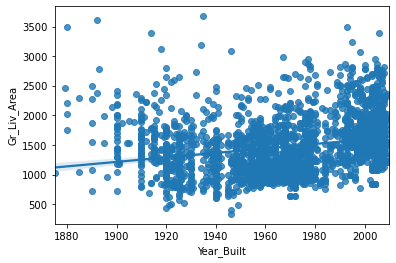

In [127]:
#correlation 
cor=df_train['Year_Built'].corr(df_train['Gr_Liv_Area'])
print('r:', round(cor, 3))
sns.regplot(x='Year_Built', y='Gr_Liv_Area', data=df_train);

In [128]:
#variables
df_simple_model= pd.DataFrame(df_train[['Year_Built', 'Gr_Liv_Area', 'SalePrice']])

In [129]:
#define X and y 
X_tr = df_simple_model.drop('SalePrice', axis=1)
y_tr = df_simple_model.SalePrice

In [130]:
#Split 80_20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X_tr, y_tr, test_size=0.20, random_state=0)

In [131]:
#Handle categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

from sklearn.compose import ColumnTransformer

cat_columns = df_simple_model.select_dtypes(exclude=np.number).columns#this is not applying any changes to the simple model since there are no categorical factors
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)#ignore because test data might contain unseen variable levels

#Handle variables to be log transformed
from sklearn.preprocessing import FunctionTransformer
log_features = ['Gr_Liv_Area']

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', cat_transformer, cat_columns),
        ('log', FunctionTransformer(np.log), log_features)],
    remainder='passthrough')

In [132]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [133]:
#regression model
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

ridge = Ridge()

In [134]:
#pipeline composition
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

In [135]:
#define Target Regressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
regressor = TransformedTargetRegressor(regressor=pipe, func=np.log, inverse_func=np.exp)#regressor accepts pipelines

In [136]:
#MAE, R2
regressor.fit(X_train, y_train)
print('MAE:', MAE(y_test, regressor.predict(X_test)))
print('R2',regressor.score(X_test, y_test))

#baseline comparison
median_predictions = np.full_like(y_test, np.median(y_train))
print('Median baseline: {:.0f}'.format(MAE(y_test, median_predictions))) 

MAE: 27727.345821068546
R2 0.7242053526808729
Median baseline: 52099


In [137]:
#MAE standard deviation
y_pred_simp= regressor.predict(X_test)
error = y_test - y_pred_simp
error = np.abs(error)
std = error.std()

In [138]:
#Here I save the parameters 
y_pred_simp= regressor.predict(X_test)#pred
MAE_simp=MAE(y_test, regressor.predict(X_test))#MAE
std_simp=std#std
baseline_simp=MAE(y_test, median_predictions)#baseline
R2_simp=regressor.score(X_test, y_test)#R2

_____________________
<h6><b>4.2.1 Simple model summary & test prediction</b></h6>

___________________

R2: 0.724
MAE: 27,727$ +/- 27,474$
Median Baseline: 52,099


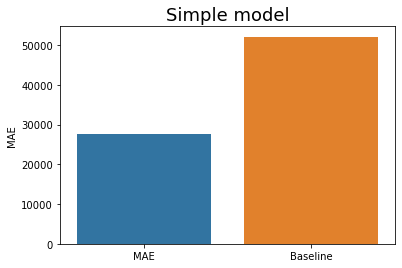

In [139]:
#print
print('R2:', round(R2_simp, 3))
print('MAE: {:,.0f}$'.format(round(MAE_simp, 3)), '+/- {:,.0f}$'.format(round(std_simp, 3)))
print('Median Baseline: {:,.0f}'.format(round(baseline_simp, 3)))

#merge parameters
simple_summary = {'MAE': [MAE_simp, baseline_simp],
                  'Param': ['MAE','Baseline']}
simple_summary = pd.DataFrame(simple_summary)

#plot
sns.barplot(x='Param', y='MAE',data=simple_summary).set(xlabel=None)
plt.title("Simple model", size=18);

The mean MAE score of my model is 27,727$ &#177; 27,474 (std). The model performs better than the baseline.

<b>SalePrice test prediction</b>

In [140]:
df_simple_model_test= pd.DataFrame(df_test[['Year_Built', 'Gr_Liv_Area']])

#predict df_test SalePrice
predictions=regressor.predict(df_simple_model_test)

#create df and save as csv
SalePrice=pd.DataFrame(predictions, columns=['SalePrice'])
predictions_simple_model=pd.concat([df_test_PID, SalePrice], axis=1)
predictions_simple_model.to_csv('predictions_simple_model.csv', index=False)

_____________________
<h6><b>4.3.  Intermediate model (10 variables + one-hot encoding)</b></h6>

___________________

For this model, I will use the same variables as for the simple model (Year_Built, Gr_Liv_Area) and I will add other 8 variables that seem to be positively associated with SalePrice.<br>
Note: for both the intermediate and complex model all the pipeline steps are written again even if only the log_features definition is the only one that has to be changed.

In [141]:
#variables
df_intermediate_model= pd.DataFrame(df_train[['Year_Built', 'Gr_Liv_Area', 'TotRms_AbvGrd', 'has_Fireplaces', 'Lot_Area',
                                              'Heating_QC', 'MS_SubClass', 'has_Garage_Cars', 'Neighborhood', 'Overall_Qual',
                                              'SalePrice']])

In [142]:
#define X and y 
X_tr = df_intermediate_model.drop('SalePrice', axis=1)
y_tr = df_intermediate_model.SalePrice

In [143]:
#Split 80_20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X_tr, y_tr, test_size=0.20, random_state=0)

In [144]:
#Handle categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

from sklearn.compose import ColumnTransformer

cat_columns = df_intermediate_model.select_dtypes(exclude=np.number).columns
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)#ignore because test data might contain unseen variable levels

#Handle variables to be log transformed
from sklearn.preprocessing import FunctionTransformer
log_features = ['Gr_Liv_Area', 'Lot_Area']

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', cat_transformer, cat_columns),
        ('log', FunctionTransformer(np.log), log_features)],
    remainder='passthrough')

In [145]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [146]:
#regression model
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

ridge = Ridge()

In [147]:
#pipeline composition
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

In [148]:
#define Target Regressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
regressor = TransformedTargetRegressor(regressor=pipe, func=np.log, inverse_func=np.exp)#regressor accepts pipelines

In [149]:
#MAE, R2
regressor.fit(X_train, y_train)
print('MAE:', MAE(y_test, regressor.predict(X_test)))
print('R2',regressor.score(X_test, y_test))

#baseline comparison
median_predictions = np.full_like(y_test, np.median(y_train))
print('Median baseline: {:.0f}'.format(MAE(y_test, median_predictions))) 

MAE: 17271.480892060794
R2 0.9020672725428389
Median baseline: 52099


In [150]:
#MAE std
y_pred_int= regressor.predict(X_test)
error = y_test - y_pred_int
error = np.abs(error)
std = error.std()

In [151]:
#Here I save the parameters 
y_pred_int= regressor.predict(X_test)#pred
MAE_int=MAE(y_test, regressor.predict(X_test))#MAE
std_int=std#std
baseline_int=MAE(y_test, median_predictions)#baseline
R2_int=regressor.score(X_test, y_test)#R2

_____________________
<h6><b>4.3.1 Intermediate model summary & test prediction</b></h6>

___________________

R2: 0.902
MAE: 17,271$ +/- 15,578$
Median Baseline: 52,099


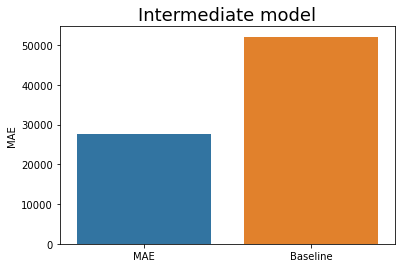

In [152]:
#print
print('R2:', round(R2_int, 3))
print('MAE: {:,.0f}$'.format(round(MAE_int, 3)), '+/- {:,.0f}$'.format(round(std_int, 3)))
print('Median Baseline: {:,.0f}'.format(round(baseline_int, 3)))

#merge parameters
intermediate_summary = {'MAE': [MAE_int, baseline_int],
                  'Param': ['MAE','Baseline']}
Intermediate_summary = pd.DataFrame(intermediate_summary)

#plot
sns.barplot(x='Param', y='MAE',data=simple_summary).set(xlabel=None)
plt.title("Intermediate model", size=18);

The mean MAE score of my model is 17,271$ &#177; 15,578 (std). The model performs better than the baseline.

<b>SalePrice test prediction</b>

In [153]:
df_intermediate_model_test= pd.DataFrame(df_test[['Year_Built', 'Gr_Liv_Area', 'TotRms_AbvGrd', 'has_Fireplaces', 'Lot_Area',
                                              'Heating_QC', 'MS_SubClass', 'has_Garage_Cars', 'Neighborhood', 'Overall_Qual']])

#predict df_test SalePrice
predictions=regressor.predict(df_intermediate_model_test)

#create df and save as csv
SalePrice=pd.DataFrame(predictions, columns=['SalePrice'])
predictions_intermediate_model=pd.concat([df_test_PID, SalePrice], axis=1)
predictions_intermediate_model.to_csv('predictions_intermediate_model.csv', index=False)

In [154]:
df_intermediate_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417 entries, 0 to 2429
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_Built       2417 non-null   int64  
 1   Gr_Liv_Area      2417 non-null   int64  
 2   TotRms_AbvGrd    2417 non-null   int64  
 3   has_Fireplaces   2417 non-null   float64
 4   Lot_Area         2417 non-null   int64  
 5   Heating_QC       2417 non-null   int64  
 6   MS_SubClass      2417 non-null   object 
 7   has_Garage_Cars  2417 non-null   float64
 8   Neighborhood     2417 non-null   object 
 9   Overall_Qual     2417 non-null   int64  
 10  SalePrice        2417 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 306.6+ KB


_____________________
<h6><b>4.4. Complex model (all variables)</b></h6>

___________________

In [155]:
#define X and y 
X_tr = df_train.drop('SalePrice', axis=1)
y_tr = df_train.SalePrice

In [156]:
#Split 80_20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X_tr, y_tr, test_size=0.20, random_state=0)

In [157]:
#Handle categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

from sklearn.compose import ColumnTransformer

cat_columns = df_train.select_dtypes(exclude=np.number).columns
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)#ignore because test data might contain unseen variable levels

#Handle variables to be log transformed
from sklearn.preprocessing import FunctionTransformer
log_features = ['Gr_Liv_Area', 'TotRms_AbvGrd', 'Lot_Frontage',
                'Lot_Area', 'first_Flr_SF']

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', cat_transformer, cat_columns),
        ('log', FunctionTransformer(np.log), log_features)],
    remainder='passthrough')

In [158]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [159]:
#regression model
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

ridge = Ridge()

In [160]:
#pipeline composition
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

In [161]:
#define Target Regressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
regressor = TransformedTargetRegressor(regressor=pipe, func=np.log, inverse_func=np.exp)#regressor accepts pipelines

In [162]:
#MAE, R2
regressor.fit(X_train, y_train)
print('MAE:', MAE(y_test, regressor.predict(X_test)))
print('R2',regressor.score(X_test, y_test))

#baseline comparison
median_predictions = np.full_like(y_test, np.median(y_train))
print('Median baseline: {:.0f}'.format(MAE(y_test, median_predictions))) 

MAE: 12439.447963335795
R2 0.9458613388185931
Median baseline: 52099


_____________________
<h6><b>4.4.1 Regularization </b></h6>

___________________

In [163]:
# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-10, 10, num=100):
    pipe.set_params(ridge__alpha=alpha)
    regressor.fit(X_train, y_train)
    
    gs_results.append({
        'alpha': alpha,
        'train_mae': MAE(y_train, regressor.predict(X_train)),
        'test_mae': MAE(y_test, regressor.predict(X_test)),
    })

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

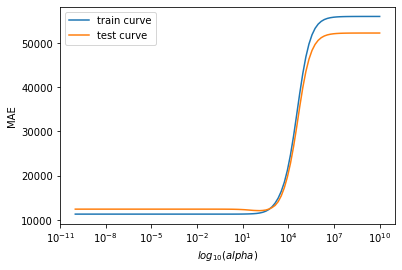

In [164]:
plt.semilogx(gs_results['alpha'], gs_results['train_mae'], label='train curve')
plt.semilogx(gs_results['alpha'], gs_results['test_mae'], label='test curve')
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [165]:
# Get entry with the best test MSE
best_result = gs_results.loc[gs_results.test_mae.idxmin()]

# Print the details
print('Best alpha: {:.0f}'.format(best_result.alpha))
print('Test MAE: {:,.0f}$'.format(best_result.test_mae))

Best alpha: 132
Test MAE: 12,114$


In [166]:
#fit the model with the best alpha
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=best_result.alpha))])

regressor = TransformedTargetRegressor(regressor=pipe, func=np.log, inverse_func=np.exp)#regressor accepts pipelines

In [167]:
#MAE, R2
regressor.fit(X_train, y_train)
print('MAE:', MAE(y_test, regressor.predict(X_test)))
print('R2',regressor.score(X_test, y_test))

#baseline comparison
median_predictions = np.full_like(y_test, np.median(y_train))
print('Median baseline: {:.0f}'.format(MAE(y_test, median_predictions))) 

MAE: 12113.753124433542
R2 0.9491977261639991
Median baseline: 52099


In [168]:
#MAE std
y_pred_comp= regressor.predict(X_test)
error = y_test - y_pred_comp
error = np.abs(error)
std = error.std()

In [169]:
#Here I save the parameters 
y_pred_comp= regressor.predict(X_test)#pred
MAE_comp=MAE(y_test, regressor.predict(X_test))#MAE
std_comp=std#std
baseline_comp=MAE(y_test, median_predictions)#baseline
R2_comp=regressor.score(X_test, y_test)#R2

_____________________
<h6><b>4.4.2. Complex model summary & test prediction</b></h6>

___________________

R2: 0.949
MAE: 12,114$ +/- 11,572$
Median Baseline: 52,099


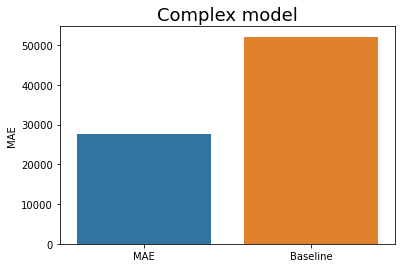

In [170]:
#print
print('R2:', round(R2_comp, 3))
print('MAE: {:,.0f}$'.format(round(MAE_comp, 3)), '+/- {:,.0f}$'.format(round(std_comp, 3)))
print('Median Baseline: {:,.0f}'.format(round(baseline_comp, 3)))

#merge parameters
complex_summary = {'MAE': [MAE_comp, baseline_comp],
                  'Param': ['MAE','Baseline']}
complex_summary = pd.DataFrame(complex_summary)

#plot
sns.barplot(x='Param', y='MAE',data=simple_summary).set(xlabel=None)
plt.title("Complex model", size=18);

The mean MAE score of my model is 12,114$ &#177; 11,572 (std). The model performs better than the baseline.

<b>SalePrice test prediction</b>

In [171]:
#predict df_test SalePrice
predictions=regressor.predict(df_test)

#create df and save as csv
SalePrice=pd.DataFrame(predictions, columns=['SalePrice'])
predictions_complex_model=pd.concat([df_test_PID, SalePrice], axis=1)
predictions_complex_model.to_csv('predictions_complex_model.csv', index=False)

______________
<h6><b>4.5. Final models comparison</b></h6>

______________

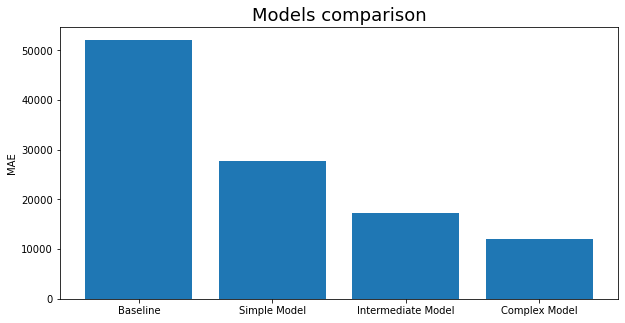

In [172]:
# Bar plot
mae_values = [baseline_simp, MAE_simp, MAE_int, MAE_comp]
titles = ['Baseline', 'Simple Model', 'Intermediate Model', 'Complex Model']

plt.figure(figsize=(10, 5))
xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title("Models comparison", size=18);

plt.ylabel('MAE')
plt.show()

In [173]:
simple_summary = {'MAE': [MAE_simp, MAE_int, MAE_comp],
                  'Std': [std_simp, std_int, std_comp],
                  'R2': [R2_simp, R2_int, R2_comp]}
pd.DataFrame(simple_summary)

MAE           Std        R2
0  27727.345821  27473.912029  0.724205
1  17271.480892  15577.894028  0.902067
2  12113.753124  11571.621819  0.949198